<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">EXPLORATORY DATA ANALYSIS - INDIA TOURISM
</h1>
</div>

# Importing required libraries

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show, output_notebook 
from bokeh.models import ColumnDataSource 
from scipy import stats
from ipywidgets import interact, Dropdown
from statsmodels.tsa.arima.model import ARIMA

# Country quarter wise visitors

## Loading of data

In [19]:
quarterwise=pd.read_csv("Country Quater Wise Visitors.csv")
quarterwise.head()

,CountryofNationality,20141stquarter(Jan-March),20142ndquarter(Apr-June),20143rdquarter(July-Sep),20144thquarter(Oct-Dec),20151stquarter(Jan-March),20152ndquarter(Apr-June),20153rdquarter(July-Sep),20154thquarter(Oct-Dec),20161stquarter(Jan-March),...,20183rdquarter(July-Sep),20184thquarter(Oct-Dec),20191stquarter(Jan-March),20192ndquarter(Apr-June),20193rdquarter(July-Sep),20194thquarter(Oct-Dec),20201stquarter(Jan-March),20202ndquarter(Apr-June),20203rdquarter(July-Sep),20204thquarter(Oct-Dec)
0,Canada,33.1,14.5,15.7,36.7,34.2,14.5,15.9,35.4,34.5,...,16.19,32.94,36.4,14.3,14.8,34.5,88.9,0.3,2.0,8.8
1,UnitedStatesOfAmerica,25.7,22.0,20.6,31.7,26.4,22.1,19.6,31.9,25.7,...,20.23,31.22,26.9,21.4,19.3,32.3,84.5,0.9,3.8,10.8
2,Argentina,46.8,15.6,13.9,23.7,40.6,17.5,14.6,27.3,41.7,...,15.71,20.22,41.5,16.8,16.7,25.1,97.8,0.2,0.5,1.5
3,Brazil,31.0,18.8,18.7,31.5,34.8,19.0,19.6,26.6,29.7,...,18.95,28.00,32.1,19.5,18.7,29.7,92.6,0.9,2.3,4.1
4,Mexico,23.6,20.3,26.5,29.6,28.1,21.3,23.4,27.2,25.4,...,22.60,31.34,25.0,21.8,21.9,31.2,95.8,0.5,1.2,2.4


In [14]:
quarterwise.shape

(63, 29)

## Data cleaning

In [20]:
# Columns with null values
for i in quarterwise.columns:
    if(quarterwise[i].isnull().sum()>0):
        print(i,round(quarterwise[i].isnull().sum()/quarterwise.shape[0]*100,4))

20141stquarter(Jan-March) 1.5873
20142ndquarter(Apr-June) 1.5873
20143rdquarter(July-Sep) 1.5873
20144thquarter(Oct-Dec) 1.5873
20151stquarter(Jan-March) 3.1746
20152ndquarter(Apr-June) 3.1746
20153rdquarter(July-Sep) 3.1746
20154thquarter(Oct-Dec) 3.1746
20171stquarter(Jan-March) 9.5238
20172ndquarter(Apr-June) 7.9365
20173rdquarter(July-Sep) 7.9365
20174thquarter(Oct-Dec) 7.9365


In [21]:
# Replacing null values with zero
quarterwise.fillna(0,inplace=True)

In [24]:
# Checking whether the data is free of null values or not
quarterwise.isnull().any()

CountryofNationality         False
20141stquarter(Jan-March)    False
20142ndquarter(Apr-June)     False
20143rdquarter(July-Sep)     False
20144thquarter(Oct-Dec)      False
20151stquarter(Jan-March)    False
20152ndquarter(Apr-June)     False
20153rdquarter(July-Sep)     False
20154thquarter(Oct-Dec)      False
20161stquarter(Jan-March)    False
20162ndquarter(Apr-June)     False
20163rdquarter(July-Sep)     False
20164thquarter(Oct-Dec)      False
20171stquarter(Jan-March)    False
20172ndquarter(Apr-June)     False
20173rdquarter(July-Sep)     False
20174thquarter(Oct-Dec)      False
20181stquarter(Jan-March)    False
20182ndquarter(Apr-June)     False
20183rdquarter(July-Sep)     False
20184thquarter(Oct-Dec)      False
20191stquarter(Jan-March)    False
20192ndquarter(Apr-June)     False
20193rdquarter(July-Sep)     False
20194thquarter(Oct-Dec)      False
20201stquarter(Jan-March)    False
20202ndquarter(Apr-June)     False
20203rdquarter(July-Sep)     False
20204thquarter(Oct-D

<p>Here since there are no null values, the data is cleaned and we can proceed with analysis.</p>

## Data analysis

### Average percentage of visitors according to quarters

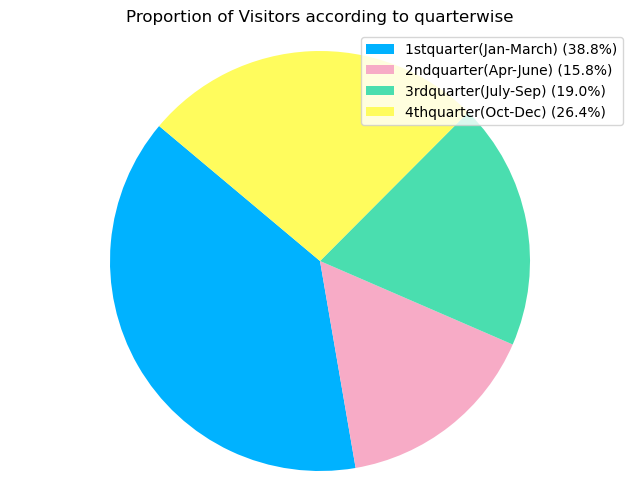

In [45]:
quarter = ['1stquarter(Jan-March)', '2ndquarter(Apr-June)','3rdquarter(July-Sep)','4thquarter(Oct-Dec)']
total_visitors_by_quarter = {quarter: quarterwise[[f'{year}{quarter}' for year in range(2014, 2021)]].sum(axis=1).sum() for quarter in quarter}

# Calculate percentages for each quarter
total_visitors = sum(total_visitors_by_quarter.values())
percentages = {quarter: (count / total_visitors) * 100 for quarter, count in total_visitors_by_quarter.items()}

# Define colors
colors = ['#00b2ff','#f7abc6','#4adeaf','#fffc5d']

# Create a pie chart without labels
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(total_visitors_by_quarter.values() ,labels=None, startangle=140, colors=colors)

# Create legend labels with quarter names and percentages
legend_labels = [f'{quarter} ({percent:.1f}%)' for quarter, percent in percentages.items()]

# Create a legend with quarter names and percentages
plt.legend(wedges, legend_labels, loc='upper right')

plt.title('Proportion of Visitors according to quarterwise')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<p>From the above pie chart, we can observe that visitors from other countries are visiting India more in the first quarter of the year that is from January to March.</p>

### Quartely distribution of tourists from US between years 2014 to 2020

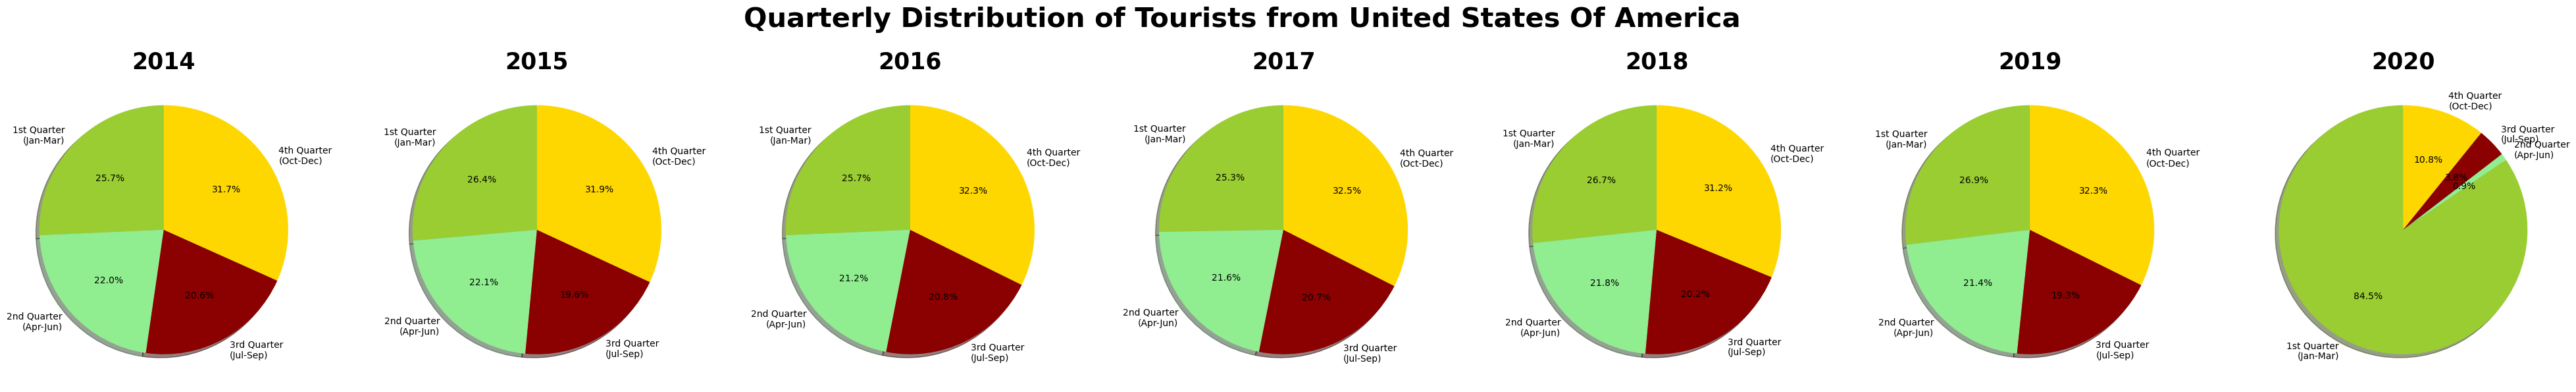

In [47]:
# plotting subplots (pie charts)
fig, axes = plt.subplots(1,7, sharex=True, figsize=(50,7))
fig.suptitle('Quarterly Distribution of Tourists from United States Of America',fontsize=30,fontweight='bold')

quarter_labels=['1st Quarter\n(Jan-Mar)','2nd Quarter\n(Apr-Jun)','3rd Quarter\n(Jul-Sep)','4th Quarter\n(Oct-Dec)']
  
colors = ['yellowgreen', 'lightgreen', 'darkred', 'gold','darkgreen', 'red', 'lightsalmon']

# plotting data on chart
axes[0].pie(quarterwise.loc[1,'20141stquarter(Jan-March)':'20144thquarter(Oct-Dec)'].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title("2014",fontsize=25,fontweight='bold')

axes[1].pie(quarterwise.loc[1,'20151stquarter(Jan-March)':'20154thquarter(Oct-Dec)'].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].set_title("2015",fontsize=25,fontweight='bold')

axes[2].pie(quarterwise.loc[1,'20161stquarter(Jan-March)':'20164thquarter(Oct-Dec)'].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[2].set_title("2016",fontsize=25,fontweight='bold')

axes[3].pie(quarterwise.loc[1,'20171stquarter(Jan-March)':'20174thquarter(Oct-Dec)'].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[3].set_title("2017",fontsize=25,fontweight='bold')

axes[4].pie(quarterwise.loc[1,'20181stquarter(Jan-March)':'20184thquarter(Oct-Dec)'].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[4].set_title("2018",fontsize=25,fontweight='bold')

axes[5].pie(quarterwise.loc[1,'20191stquarter(Jan-March)':'20194thquarter(Oct-Dec)'].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[5].set_title("2019",fontsize=25,fontweight='bold')

axes[6].pie(quarterwise.loc[1,'20201stquarter(Jan-March)':'20204thquarter(Oct-Dec)'].values.tolist(), labels=quarter_labels, colors=colors, 
            autopct='%1.1f%%',shadow=True, startangle=90)
axes[6].set_title("2020",fontsize=25,fontweight='bold')

plt.show()

### Percentage of visitors according to the quarters from first 10 countries

In [50]:
df=quarterwise.head(10)
quarters = ['20171stquarter(Jan-March)', '20172ndquarter(Apr-June)','20173rdquarter(July-Sep)','20174thquarter(Oct-Dec)'] 
colors = ['#004B4B','#008B8B', '#00CBCB', '#4BFFFF',] 
fig = figure(x_range=df.CountryofNationality, 
             height=500, 
             title="Percentage of visitors acccording to the quarters",tools="hover", 
             tooltips="$name @CountryofNationality: @$name") 
fig.vbar_stack(quarters, 
               x='CountryofNationality', 
               source=ColumnDataSource(df), 
               color=colors, 
               width=0.5, 
               legend_label=quarters) 
# Display Stack Graph
fig.legend.orientation = "vertical"
fig.legend.location = "top_right"
show(fig) 

# Country Wise Age Group

## Loading of data

In [3]:
agewise=pd.read_csv("Country Wise Age Group.csv")
agewise.head()

,Country of Nationality,2014 0-14,2014 15-24,2014 25-34,2014 35-44,2014 45-54,2014 55-64,2014 65 AND ABOVE,2015 0-14,2015 15-24,...,2019 45-54,2019 55-64,2019 65 AND ABOVE,2020 0-14,2020 15-24,2020 25-34,2020 35-44,2020 45-54,2020 55-64,2020 65 AND ABOVE
0,Canada,15.2,6.9,11.7,17.0,18.2,15.6,15.4,15.3,6.8,...,19.2,15.7,15.8,15.7,4.6,12.6,15.8,18.3,16.5,16.4
1,United States Of America,19.8,6.7,10.1,17.4,20.5,15.0,10.5,20.0,6.9,...,21.8,14.8,11.8,13.8,5.3,11.3,14.1,21.9,18.7,14.9
2,Argentina,1.6,5.5,26.6,19.3,17.6,17.5,11.9,2.2,5.9,...,16.7,17.7,10.6,2.2,7.1,23.1,19.7,18.4,18.6,10.9
3,Brazil,2.5,6.7,27.3,23.4,19.1,15.0,6.0,2.6,8.1,...,16.6,13.4,6.8,2.7,5.9,24.5,27.0,18.0,15.0,6.9
4,Mexico,2.7,8.7,25.1,22.5,17.9,15.7,7.4,2.7,9.2,...,17.3,15.7,7.7,2.4,5.9,26.8,22.3,18.3,16.2,8.0


In [26]:
agewise.shape

(63, 50)

## Data cleaning

In [27]:
# Columns with null values
for i in agewise.columns:
    if(agewise[i].isnull().sum()>0):
        print(i,round(agewise[i].isnull().sum()/agewise.shape[0]*100,4))

2017 0-14 22.2222
2017 15-24 17.4603
2017 25-34 17.4603
2017 35-44 17.4603
2017 45-54 17.4603
2017 55-64 17.4603
2017 65 AND ABOVE 19.0476


In [28]:
agewise.fillna(0,inplace=True)

In [29]:
agewise.isnull().any()

Country of Nationality    False
2014 0-14                 False
2014 15-24                False
2014 25-34                False
2014 35-44                False
2014 45-54                False
2014 55-64                False
2014 65 AND ABOVE         False
2015 0-14                 False
2015 15-24                False
2015 25-34                False
2015 35-44                False
2015 45-54                False
2015 55-64                False
2015 65 AND ABOVE         False
2016 0-14                 False
2016 15-24                False
2016 25-34                False
2016 35-44                False
2016 45-54                False
2016 55-64                False
2016 65 AND ABOVE         False
2017 0-14                 False
2017 15-24                False
2017 25-34                False
2017 35-44                False
2017 45-54                False
2017 55-64                False
2017 65 AND ABOVE         False
2018 0-14                 False
2018 15-24                False
2018 25-

<p>Here since there are no null values, the data is cleaned and we can proceed with analysis.</p>

## Data analysis

### Average percentage of visitors according to age groups

C:\Users\Kowstubha\AppData\Local\Temp\ipykernel_18592\2712942306.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_visitors_by_age = {age: agewise[[f'{year} {age}' for year in range(2014, 2021)]].sum(axis=1).sum() for age in age}
C:\Users\Kowstubha\AppData\Local\Temp\ipykernel_18592\2712942306.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_visitors_by_age = {age: agewise[[f'{year} {age}' for year in range(2014, 2021)]].sum(axis=1).sum() for age in age}


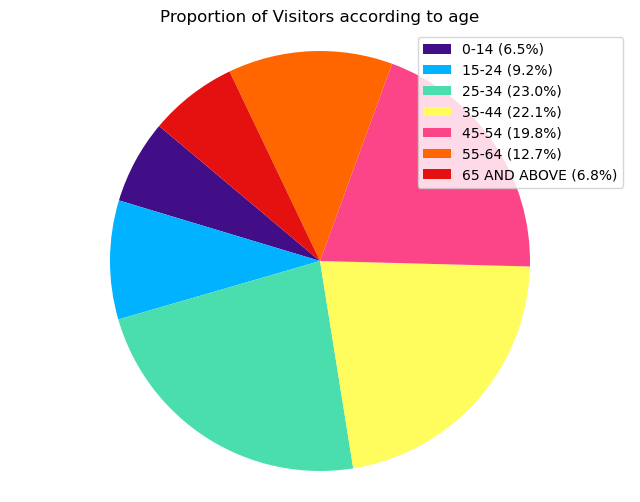

In [51]:
age = ['0-14', '15-24','25-34','35-44','45-54','55-64','65 AND ABOVE']
total_visitors_by_age = {age: agewise[[f'{year} {age}' for year in range(2014, 2021)]].sum(axis=1).sum() for age in age}

# Calculate percentages for each age group
total_visitors = sum(total_visitors_by_age.values())
percentages = {age: (count / total_visitors) * 100 for age, count in total_visitors_by_age.items()}

# Define colors
colors = ['#420e87','#00b2ff','#4adeaf','#fffc5d','#fc4589','#ff6600','#e51010']

# Create a pie chart without labels
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(total_visitors_by_age.values() ,labels=None, startangle=140, colors=colors)

# Create legend labels with age groups and percentages
legend_labels = [f'{age} ({percent:.1f}%)' for age, percent in percentages.items()]

# Create a legend with age groups and percentages
plt.legend(wedges, legend_labels, loc='upper right')

plt.title('Proportion of Visitors according to age')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<p>From the above pie chart, we can observe that most of the visitors who are visiting India from other countries belongs to the age group from 25 to 34 years.</p>

### Average number of tourists in each age group across all countries per year

C:\Users\Kowstubha\AppData\Local\Temp\ipykernel_18592\3324236488.py:5: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



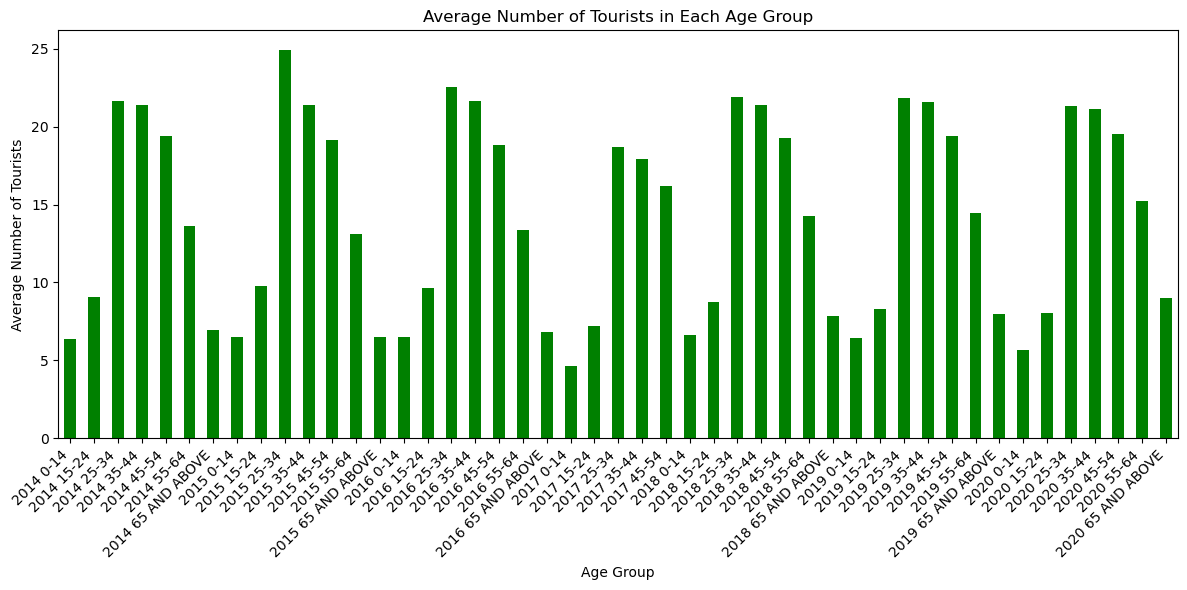

In [216]:
# Extracting columns related to age groups
age_group_columns = agewise.columns[1:]

# Calculating the average number of tourists in each age group across all countries
average_tourists_by_age_group = agewise[age_group_columns].mean()

# Plotting the average number of tourists in each age group
plt.figure(figsize=(12, 6))  # Increase the width of the figure
average_tourists_by_age_group.plot(kind='bar', color='green')
plt.title('Average Number of Tourists in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Tourists')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right
plt.tight_layout()
plt.show()

<p>From the above graph, we can observe that most of the tourists visited India in the year 2015 who are of the age between 25-34</p>

# Country Wise Airport

## Loading of data

In [54]:
airportwise=pd.read_csv("Country Wise Airport.csv")
airportwise.head()

,Country of Nationality,2014 Delhi (Airport),2014 Mumbai (Airport),2014 Chennai (Airport),2014 Calicut (Airport),2014 Benguluru (Airport),2014 Kolkata (Airport),2014 Hyderabad (Airport),2014 Cochin (Airport),2015 Delhi (Airport),...,2019 Hyderabad (Airport),2019 Cochin (Airport),2020 Delhi (Airport),2020 Mumbai (Airport),2020 Chennai (Airport),2020 Calicut (Airport),2020 Benguluru (Airport),2020 Kolkata (Airport),2020 Hyderabad (Airport),2020 Cochin (Airport)
0,Canada,21.1,1.3,6.0,53.5,4.4,2.8,10.9,0,19.7,...,3.3,2.8,71.7,10.5,2.6,0.2,3.9,0.5,2.6,2.5
1,United States Of America,25.8,2.0,8.3,31.1,10.2,8.9,13.7,0,23.9,...,13.7,2.6,40.1,22.3,7.1,0.1,8.7,1.9,11.7,2.0
2,Argentina,18.7,3.0,4.1,57.1,5.7,1.5,9.9,0,17.3,...,3.5,1.1,30.4,34.7,6.4,0.0,11.5,2.0,3.7,5.3
3,Brazil,22.0,2.6,5.6,49.0,10.1,2.8,7.9,0,20.6,...,6.2,3.3,32.8,46.1,4.4,0.1,4.5,0.6,3.1,2.6
4,Mexico,14.7,2.1,6.1,62.8,5.7,1.9,6.7,0,15.8,...,1.6,1.1,36.8,36.3,7.2,0.1,12.1,1.5,2.8,0.5


In [55]:
airportwise.shape

(63, 57)

## Data Cleaning

In [217]:
# Columns with null values
for i in airportwise.columns:
    if(airportwise[i].isnull().sum()>0):
        print(i,round(airportwise[i].isnull().sum()/airportwise.shape[0]*100,4))

2016 Delhi (Airport) 1.5873
2016 Mumbai (Airport) 1.5873
2016 Chennai (Airport) 1.5873
2016 Kolkata (Airport) 1.5873
2016 Hyderabad (Airport) 1.5873
2016 Cochin (Airport) 4.7619
2017 Mumbai (Airport) 1.5873
2017 Cochin (Airport) 1.5873


In [58]:
airportwise.fillna(0,inplace=True)

In [59]:
airportwise.isnull().any()

Country of Nationality      False
2014 Delhi (Airport)        False
2014 Mumbai (Airport)       False
2014 Chennai (Airport)      False
2014 Calicut (Airport)      False
2014 Benguluru (Airport)    False
2014 Kolkata (Airport)      False
2014 Hyderabad (Airport)    False
2014 Cochin (Airport)       False
2015 Delhi (Airport)        False
2015 Mumbai (Airport)       False
2015 Chennai (Airport)      False
2015 Calicut (Airport)      False
2015 Benguluru (Airport)    False
2015 Kolkata (Airport)      False
2015 Hyderabad (Airport)    False
2015 Cochin (Airport)       False
2016 Delhi (Airport)        False
2016 Mumbai (Airport)       False
2016 Chennai (Airport)      False
2016 Calicut (Airport)      False
2016 Benguluru (Airport)    False
2016 Kolkata (Airport)      False
2016 Hyderabad (Airport)    False
2016 Cochin (Airport)       False
2017 Delhi (Airport)        False
2017 Mumbai (Airport)       False
2017 Chennai (Airport)      False
2017 Calicut (Airport)      False
2017 Benguluru

<p>Here since there are no null values, the data is cleaned and we can proceed with analysis.</p>

## Data analysis

### Average percentage of visitors in the airport of different cities

C:\Users\Kowstubha\AppData\Local\Temp\ipykernel_18592\4143903068.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_visitors_by_airport = {airport: airportwise[[f'{year} {airport}' for year in range(2014, 2021)]].sum(axis=1).sum() for airport in airport}
C:\Users\Kowstubha\AppData\Local\Temp\ipykernel_18592\4143903068.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_visitors_by_airport = {airport: airportwise[[f'{year} {airport}' for year in range(2014, 2021)]].sum(axis=1).sum() for airport in airport}
C:\Users\Kowstubha\AppData\Local\Temp\ipykernel_18592\4143903068.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductio

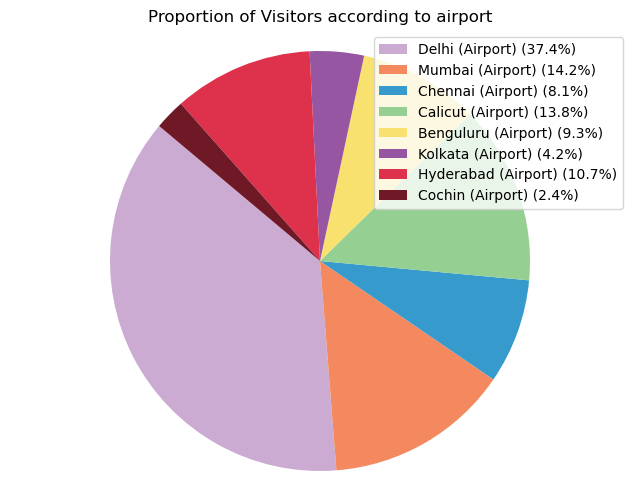

In [61]:
airport = ['Delhi (Airport)', 'Mumbai (Airport)','Chennai (Airport)','Calicut (Airport)','Benguluru (Airport)','Kolkata (Airport)','Hyderabad (Airport)','Cochin (Airport)']
total_visitors_by_airport = {airport: airportwise[[f'{year} {airport}' for year in range(2014, 2021)]].sum(axis=1).sum() for airport in airport}

# Calculate percentages for each aiport
total_visitors = sum(total_visitors_by_airport.values())
percentages = {airport: (count / total_visitors) * 100 for airport, count in total_visitors_by_airport.items()}

# Define colors
colors = ['#cbabd1','#f4895f','#369acc','#95cf92','#f8e16f','#9656a2','#de324c','#6f1926']

# Create a pie chart without labels
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(total_visitors_by_airport.values() ,labels=None, startangle=140, colors=colors)

# Create legend labels with airport places and percentages
legend_labels = [f'{airport} ({percent:.1f}%)' for airport, percent in percentages.items()]

# Create a legend with airport places and percentages
plt.legend(wedges, legend_labels, loc='upper right')

plt.title('Proportion of Visitors according to airport')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<p>From the above pie chart, we can get to know that most of the tourists are coming to Delhi airport while visiting to India from different countries.</p>

### Total number of tourists landing in different airport cities per year

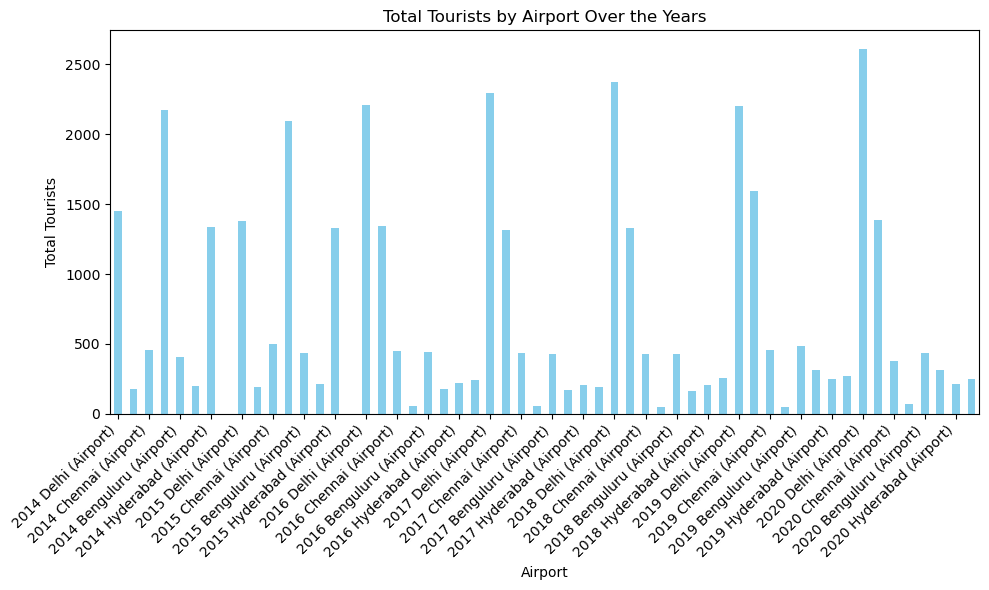

In [210]:
# Selecting columns containing year-wise tourist counts for each airport
airport_columns = [col for col in airportwise.columns if 'Airport' in col]

# Convert data to numeric format
airportwise[airport_columns] = airportwise[airport_columns].apply(pd.to_numeric, errors='coerce')

# Summing up the tourist counts for each airport over the years
total_tourists_by_airport = airportwise[airport_columns].sum()


# Plotting the trends
# Plotting the trends
plt.figure(figsize=(10, 6))
total_tourists_by_airport.plot(kind='bar', color='skyblue')
plt.title('Total Tourists by Airport Over the Years')
plt.xlabel('Airport')
plt.ylabel('Total Tourists')
plt.xticks(range(0, len(total_tourists_by_airport.index), 2), total_tourists_by_airport.index[::2], rotation=45, ha='right')
plt.tight_layout()
plt.show()

<p>From the above graph, we can observe that most of the tourists who visited India landed in delhi airport in the year 2020.</p>

# Country wise Gender

## Loading of data

In [63]:
genderwise=pd.read_csv("Country Wise Gender.csv")
genderwise.head()

,Country of Nationality,2014 Male,2014 Female,2015 Male,2015 Female,2016 Male,2016 Female,2017 Male,2017 Female,2018 Male,2018 Female,2019 Male,2019 Female,2020 Male,2020 Female
0,Canada,53.7,46.3,53.8,46.2,53.4,46.6,53.0,47.0,53.1,46.9,53.1,46.9,53.23,46.77
1,United States Of America,55.9,44.1,55.5,44.5,55.1,44.9,54.8,45.2,54.8,45.2,54.7,45.3,55.13,44.87
2,Argentina,46.2,53.8,47.2,52.8,45.7,54.3,43.2,56.8,42.6,57.4,44.8,55.2,38.91,61.09
3,Brazil,53.7,46.3,54.3,45.7,54.1,45.9,52.9,47.1,51.7,48.3,53.9,46.1,49.86,50.14
4,Mexico,50.8,49.2,51.9,48.1,50.8,49.2,48.8,51.2,47.8,52.2,48.7,51.3,47.86,52.14


In [64]:
genderwise.shape

(63, 15)

## Data cleaning

In [36]:
# Columns with null values
for i in genderwise.columns:
    if(genderwise[i].isnull().sum()>0):
        print(i,round(genderwise[i].isnull().sum()/genderwise.shape[0]*100,4))

2014 Male 1.5873
2014 Female 1.5873
2015 Male 1.5873
2015 Female 1.5873
2017 Male 1.5873
2017 Female 1.5873


In [65]:
genderwise.fillna(0,inplace=True)

In [38]:
genderwise.isnull().any()

Country of Nationality    False
2014 Male                 False
2014 Female               False
2015 Male                 False
2015 Female               False
2016 Male                 False
2016 Female               False
2017 Male                 False
2017 Female               False
2018 Male                 False
2018 Female               False
2019 Male                 False
2019 Female               False
2020 Male                 False
2020 Female               False
dtype: bool

<p>Here since there are no null values, the data is cleaned and we can proceed with analysis.</p>

## Data analysis

### Average percentage of visitors according to gender

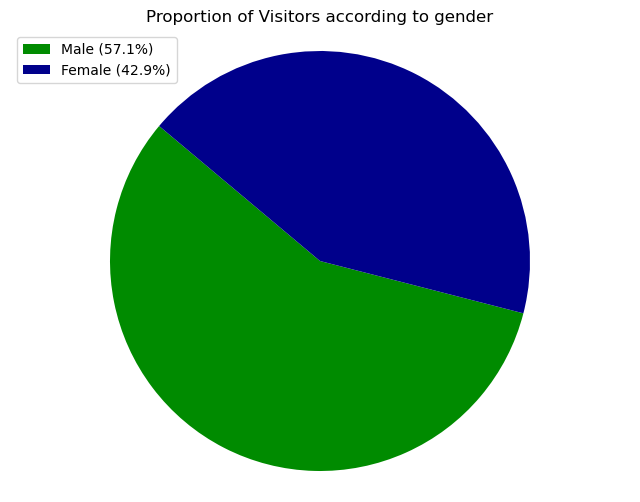

In [218]:
# Get the total number of visitors for each transport mode
gender = ['Male', 'Female']
total_visitors_by_gender = {gender: genderwise[[f'{year} {gender}' for year in range(2014, 2021)]].sum(axis=1).sum() for gender in gender}

# Calculate percentages for each transport mode
total_visitors = sum(total_visitors_by_gender.values())
percentages = {gender: (count / total_visitors) * 100 for gender, count in total_visitors_by_gender.items()}

# Define colors
colors = ['#008B00','#00008B']

# Create a pie chart without labels
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(total_visitors_by_gender.values() ,labels=None, startangle=140, colors=colors)

# Create legend labels with transport mode names and percentages
legend_labels = [f'{gender} ({percent:.1f}%)' for gender, percent in percentages.items()]

# Create a legend with transport mode names and percentages
plt.legend(wedges, legend_labels, loc='upper left')

plt.title('Proportion of Visitors according to gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<p>From the above pie chart, we can observe that percentage of male visitors who are visiting India from different countries is more than the female visitors percentage.</p>

### Total Tourists by Gender Over the Years

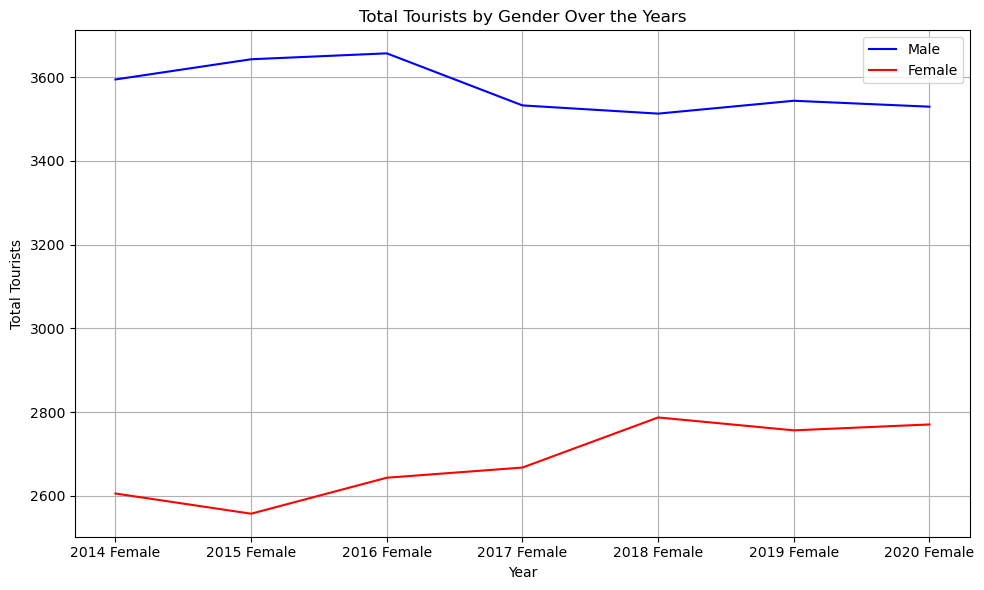

In [209]:
# Total Tourists by Gender Over the Years: Calculating the total number of tourists by gender for each year and visualize the trends.

# Extracting columns for male and female tourists
male_columns = [col for col in genderwise.columns if 'Male' in col]
female_columns = [col for col in genderwise.columns if 'Female' in col]

# Calculate total tourists by gender over the years
total_male_tourists = genderwise[male_columns].sum()
total_female_tourists = genderwise[female_columns].sum()

# Plotting the trends
plt.figure(figsize=(10, 6))
total_male_tourists.plot(label='Male', color='blue')
total_female_tourists.plot(label='Female', color='red')
plt.title('Total Tourists by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<p> From the above graph, we can observe that there is so much difference between the number of male and female visitors in every year.</p>

# Country Wise Visitors Ways

## Loading of data

In [69]:
ways = pd.read_csv("Country Wise Visitors Ways.csv")
ways.head()

,Country of Nationality,2014 AIR,2014 SEA,2014 RAIL,2014 LAND,2015 AIR,2015 SEA,2015 RAIL,2015 LAND,2016 AIR,...,2018 RAIL,2018 LAND,2019 AIR,2019 SEA,2019 RAIL,2019 LAND,2020 AIR,2020 SEA,2020 RAIL,2020 LAND
0,Canada,99.2,0.1,0.0,0.7,99.0,0.5,0.0,0.5,99.1,...,0.0,0.5,98.10,1.22,0.01,0.67,98.1,1.0,0.0,0.9
1,United States Of America,99.5,0.1,0.0,0.4,99.3,0.5,0.0,0.2,99.5,...,0.0,0.3,98.97,0.68,0.01,0.34,99.1,0.5,0.0,0.4
2,Argentina,97.9,0.0,0.0,2.1,97.7,0.4,0.0,1.9,98.5,...,0.0,1.5,96.61,1.54,0.02,1.83,97.3,1.5,0.0,1.2
3,Brazil,98.7,0.2,0.0,1.1,99.3,0.4,0.0,0.3,99.0,...,0.0,0.6,96.93,2.33,0.00,0.74,97.1,2.4,0.0,0.5
4,Mexico,99.1,0.2,0.0,0.7,98.0,1.6,0.0,0.4,96.4,...,0.0,0.4,95.82,3.89,0.00,0.29,96.7,2.8,0.0,0.4


## Data cleaning

In [70]:
ways.isnull().any()

Country of Nationality    False
2014 AIR                  False
2014 SEA                  False
2014 RAIL                 False
2014 LAND                 False
2015 AIR                  False
2015 SEA                  False
2015 RAIL                 False
2015 LAND                 False
2016 AIR                  False
2016 SEA                  False
2016 RAIL                 False
2016 LAND                 False
2017 AIR                  False
2017 SEA                  False
2017 RAIL                 False
2017 LAND                 False
2018 AIR                  False
2018 SEA                  False
2018 RAIL                 False
2018 LAND                 False
2019 AIR                  False
2019 SEA                  False
2019 RAIL                 False
2019 LAND                 False
2020 AIR                  False
2020 SEA                  False
2020 RAIL                 False
2020 LAND                 False
dtype: bool

<p>Here since there are no null values, the data is cleaned and we can proceed with analysis.</p>

## Data analysis

### Line graph representing the distribution of visitors across different transportation modes and years

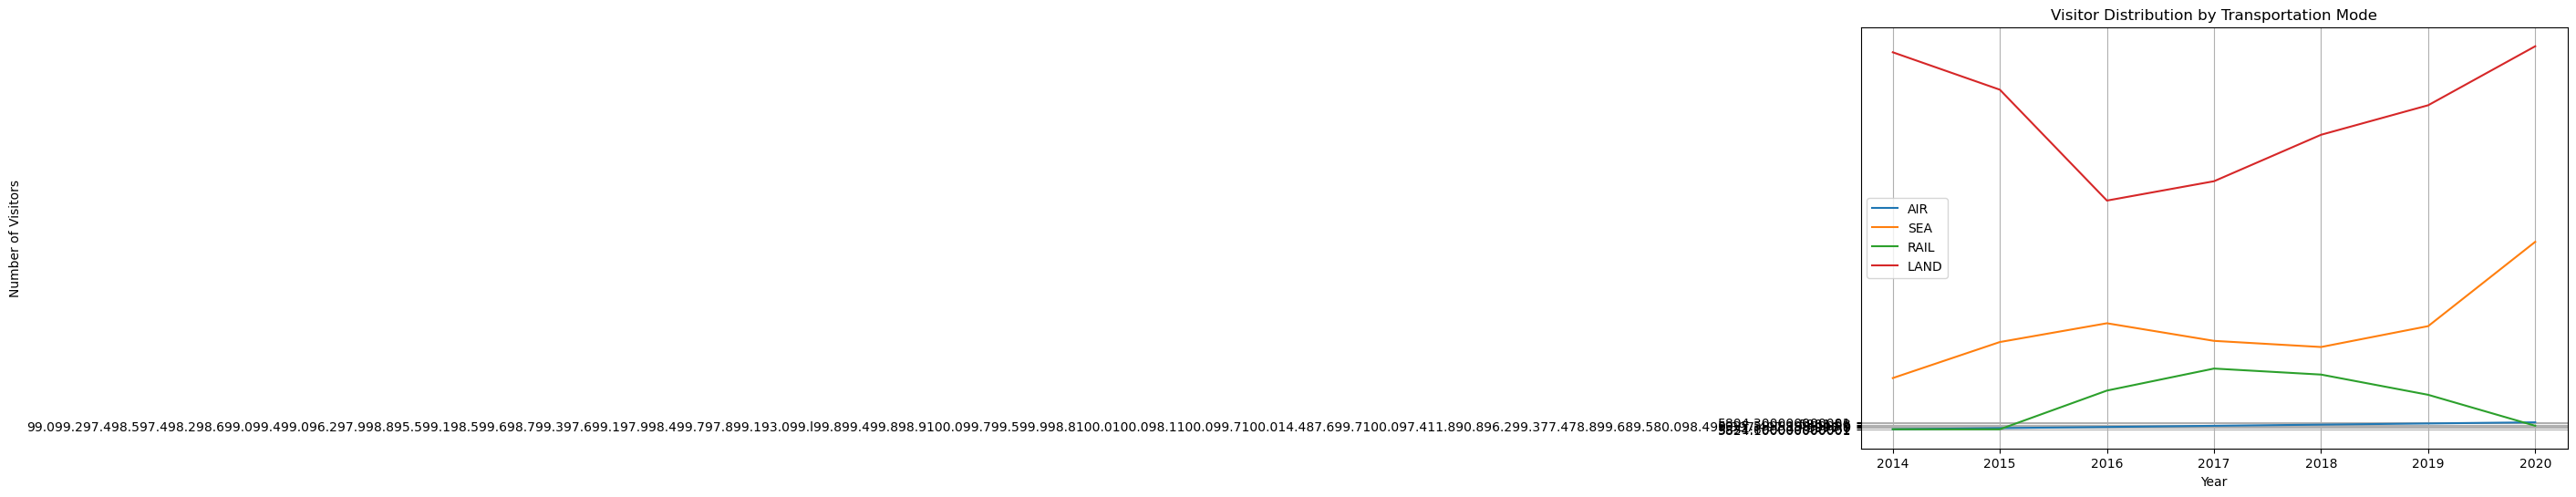

In [83]:
transport_modes = ['AIR', 'SEA', 'RAIL', 'LAND']
years = range(2014, 2021)

plt.figure(figsize=(10, 6))

for mode in transport_modes:
    mode_data = [ways[f'{year} {mode}'].sum() for year in years]
    plt.plot(years, mode_data, label=mode)

plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Visitor Distribution by Transportation Mode')
plt.legend()
plt.grid(True)
plt.show()

### The type of tranport used the most frequently


C:\Users\Kowstubha\AppData\Local\Temp\ipykernel_18592\3062797675.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



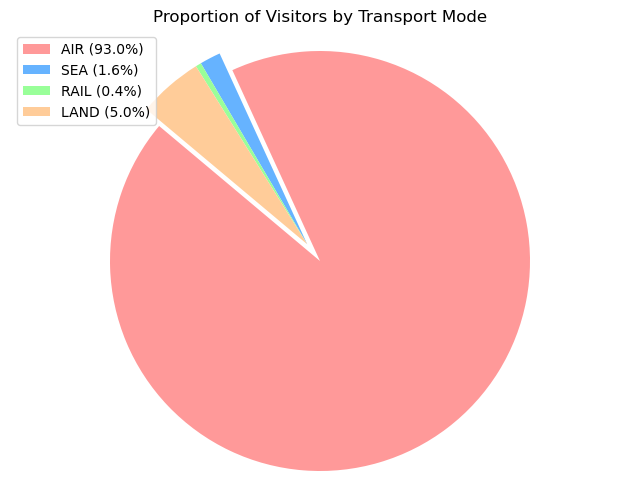

In [97]:
# Get the total number of visitors for each transport mode
transport_modes = ['AIR', 'SEA', 'RAIL', 'LAND']
total_visitors_by_mode = {mode: ways[[f'{year} {mode}' for year in range(2014, 2021)]].sum(axis=1).sum() for mode in transport_modes}

# Calculate percentages for each transport mode
total_visitors = sum(total_visitors_by_mode.values())
percentages = {mode: (count / total_visitors) * 100 for mode, count in total_visitors_by_mode.items()}

# Define colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

explode= (0.1, 0,0,0)

# Create a pie chart without labels
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(total_visitors_by_mode.values(), explode=explode ,labels=None, startangle=140, colors=colors)

# Create legend labels with transport mode names and percentages
legend_labels = [f'{mode} ({percent:.1f}%)' for mode, percent in percentages.items()]

# Create a legend with transport mode names and percentages
plt.legend(wedges, legend_labels, loc='upper left')

plt.title('Proportion of Visitors by Transport Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


<p> From the above pie chart, we can get to know that so many tourists are preferring air transport to visit India from different countries.</p>

### The overall trend in the number of visitors across all transport modes from 2014 to 2020

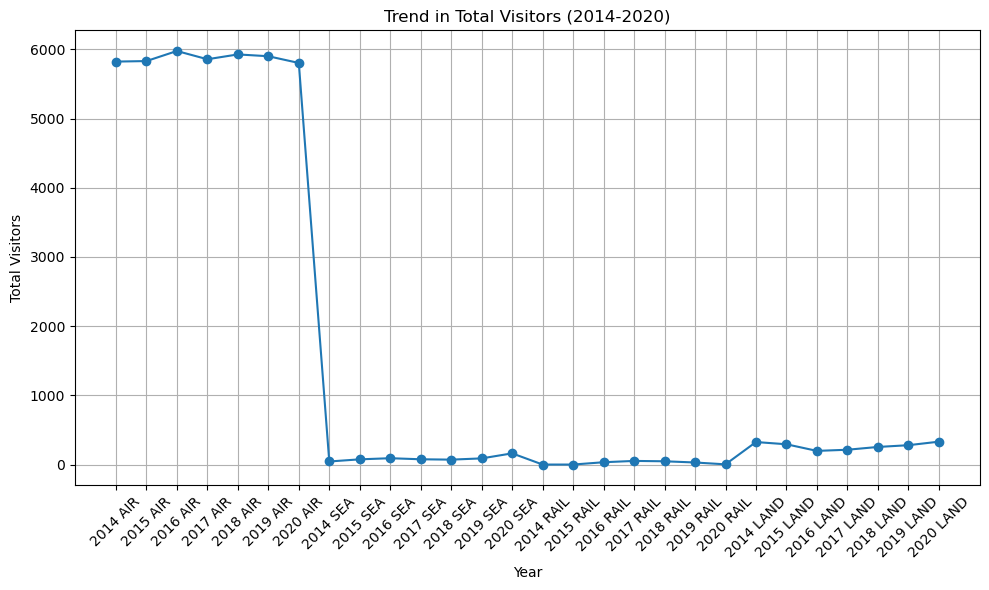

In [98]:
# Extract years and calculate total visitors for each year
years = [str(year) for year in range(2014, 2021)]
total_visitors_by_year = ways[[f'{year} AIR' for year in range(2014, 2021)] +
                            [f'{year} SEA' for year in range(2014, 2021)] +
                            [f'{year} RAIL' for year in range(2014, 2021)] +
                            [f'{year} LAND' for year in range(2014, 2021)]]

# Replace non-numeric values with NaN
total_visitors_by_year = total_visitors_by_year.apply(pd.to_numeric, errors='coerce')

# Remove columns with only NaN values
total_visitors_by_year = total_visitors_by_year.loc[:, total_visitors_by_year.notna().any()]

# Calculate total visitors for each year
total_visitors_by_year = total_visitors_by_year.sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(total_visitors_by_year.index, total_visitors_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Visitors')
plt.title('Trend in Total Visitors (2014-2020)')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


<p> From the above graph, we can observe that there is a sudden drop in the total number of visitors in the year 2020. This is beacuse of lockdown happened during covid time.</p>

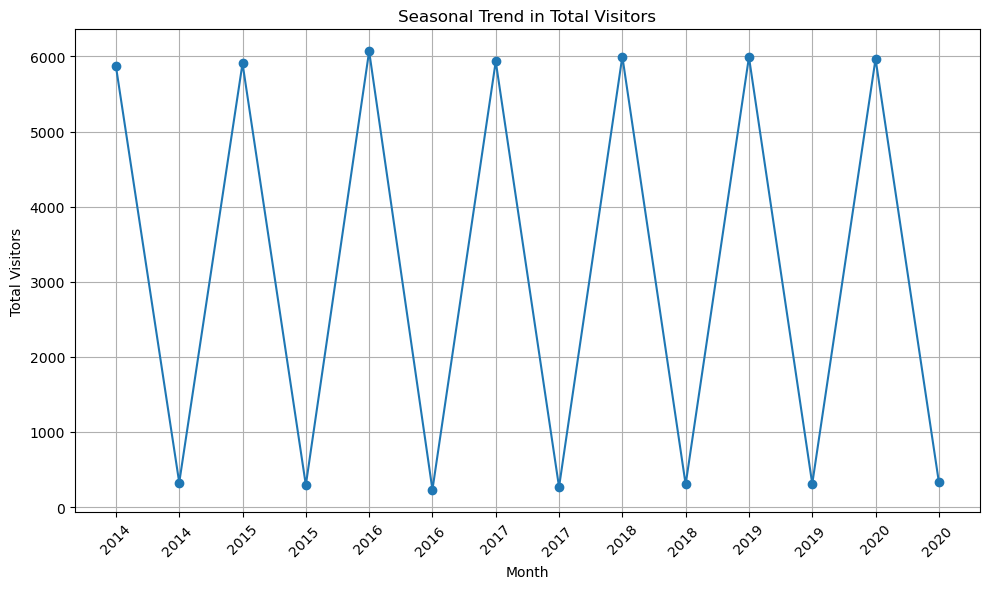

In [100]:
# Convert non-numeric values to NaN
ways = ways.apply(pd.to_numeric, errors='coerce')

# Extract month-wise data and calculate total visitors for each month
monthwise_data = {}
for column in ways.columns[1:]:
    month = column[:-4]  # Extract month information from the column name
    if month not in monthwise_data:
        monthwise_data[month] = ways[column]
    else:
        monthwise_data[month] += ways[column]

# Create a DataFrame from the monthwise_data dictionary
monthwise_df = pd.DataFrame(monthwise_data)

# Calculate total visitors for each month
total_visitors_by_month = monthwise_df.sum()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
plt.plot(total_visitors_by_month.index, total_visitors_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.title('Seasonal Trend in Total Visitors')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Country Wise Yearly Visitors

## Loading of data

In [221]:
yearwise = pd.read_csv("Country Wise Yearly Visitors.csv")
yearwise.head()

,Country,2014,2015,2016,2017,2018,2019,2020
0,Canada,268485,281306,317239,335439,351040,351859,122868
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092
2,Argentina,9731,9351,12308,14875,16345,12844,4294
3,Brazil,19563,20610,21289,24453,26579,25422,8092
4,Mexico,13978,14049,15689,18114,19909,20766,4580


## Data cleaning

In [222]:
yearwise.isnull().any()

Country    False
2014       False
2015       False
2016       False
2017       False
2018       False
2019       False
2020       False
dtype: bool

<p>Here since there are no null values, the data is cleaned and we can proceed with analysis.</p>

## Data analysis

In [223]:
# Exclude non-numeric columns from the dataset
numeric_df = yearwise.select_dtypes(include=['int64', 'float64'])

# Calculate z-scores for each data point in the numeric part of the dataset
z_scores = stats.zscore(numeric_df)

# Define a threshold for considering outliers
threshold = 3  # Adjust this threshold as needed based on your data and requirements

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Print rows containing outliers
print("Rows containing outliers:")
print(yearwise[outlier_indices])


Rows containing outliers:
       Country     2014     2015     2016     2017     2018     2019    2020
1        U.S.A  1118983  1213624  1296939  1376919  1456678  1512032  394092
20        U.K.   838860   867601   941883   986296  1029757  1000292  291874
43  Bangladesh   942562  1133879  1380409  2156557  2256675  2577727  549273


### Finding the country with the highest number of visitors and in which year with the count

In [224]:
# Find the maximum number of visitors across all years for each country
yearwise['Max_Visitors'] = yearwise[['2014', '2015', '2016', '2017', '2018', '2019', '2020']].max(axis=1)

# Get the corresponding year for the maximum number of visitors
yearwise['Year_of_Max_Visitors'] = yearwise[['2014', '2015', '2016', '2017', '2018', '2019', '2020']].idxmax(axis=1).str.extract('(\d+)')
yearwise['Year_of_Max_Visitors'] = yearwise['Year_of_Max_Visitors'].astype(int)

# Find the country with the highest number of visitors and in which year
max_visitors_country = yearwise.loc[yearwise['Max_Visitors'].idxmax()]

print("Country with the highest number of visitors:")
print("Country:", max_visitors_country['Country'])
print("Number of Visitors:", max_visitors_country['Max_Visitors'])
print("Year:", max_visitors_country['Year_of_Max_Visitors'])


Country with the highest number of visitors:
Country: Bangladesh
Number of Visitors: 2577727
Year: 2019


In [225]:
# Find the total number of visitors for each country
yearwise['Total_Visitors'] = yearwise[['2014', '2015', '2016', '2017', '2018', '2019', '2020']].sum(axis=1)

# Sort the DataFrame by total visitors in descending order
df_sorted = yearwise.sort_values(by='Total_Visitors', ascending=False)

# Create the pie chart with Plotly
fig = go.Figure(data=[go.Pie(
    values=df_sorted['Total_Visitors'],
    labels=df_sorted['Country'],
    hole=0.4,  # Create a donut chart with a hole in the center
    textinfo='percent+label',  # Display both percentage and label on hover
    textposition='inside',  # Place text labels inside the pie slices
    marker_colors=px.colors.qualitative.Pastel  # Use a qualitative color palette
)])

# Customize the chart layout
fig.update_layout(
    title='Distribution of Visitors by Country',
    title_x=0.5,  # Center the title
    font_size=14
)

# Display the plot
fig.show()

### Total number of visitors from each country

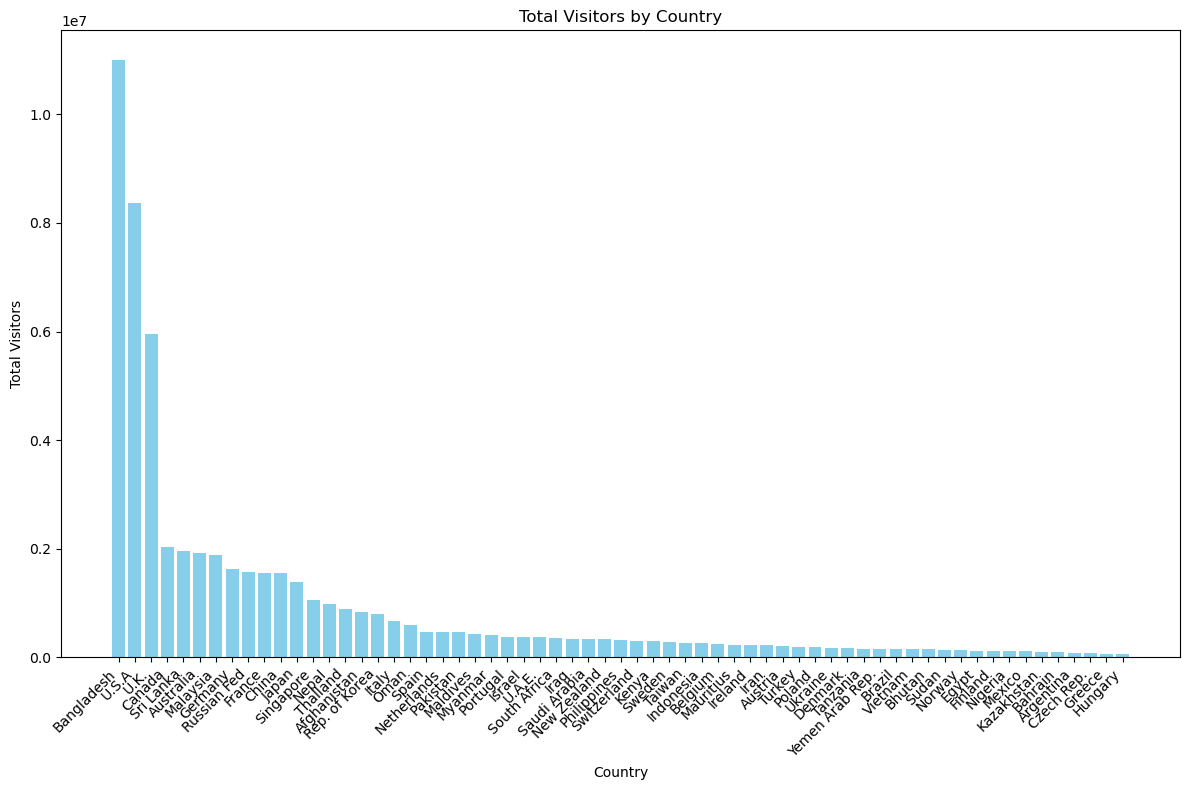

In [226]:
# Find the total number of visitors for each country
yearwise['Total_Visitors'] = yearwise[['2014', '2015', '2016', '2017', '2018', '2019', '2020']].sum(axis=1)

# Sort the DataFrame by total visitors in descending order
df_sorted = yearwise.sort_values(by='Total_Visitors', ascending=False)

# Round the total visitor counts to the nearest integer
df_sorted['Total_Visitors'] = df_sorted['Total_Visitors'].round().astype(int)

# Plot a bar plot
plt.figure(figsize=(12, 8))
plt.bar(df_sorted['Country'], df_sorted['Total_Visitors'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.title('Total Visitors by Country')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of country names
plt.show()


<p> From the above graph, we can get to know that most of the visitors to India are form Bangladesh.</p>

# General Data 2014-2020

## Loading of data

In [8]:
general= pd.read_csv("General Data 2014-2020.csv")
general.head()

,year,noftaii,noftaiiagr,noindfi,noindfiagr,nodtvasu,nodtvasuagr,feeftit,feeftitagr,feeftust,...,apfitr,apritragr,ipwiita,ipwirwta,ipwsiitr,ipwirwtr,ipaprita,ipaprirta,ipapritr,ipaprirtr
0,2014,7.68,10.2,18.33,10.3,1290.00,12.9,123320,14.5,20.240,...,377.0,4.7,0.68,41,1.62,15,2.91,12,5.37,8
1,2015,8.03,4.5,20.38,11.1,1432.00,11.6,135193,9.6,21.070,...,418.9,-0.3,0.68,40,1.71,14,2.88,11,5.03,7
2,2016,8.80,9.7,21.87,7.3,1613.60,12.7,154146,14.0,22.920,...,366.7,4.9,1.18,25,1.88,13,4.72,8,6.25,7
3,2017,10.04,14.0,23.94,9.5,1652.49,2.3,177874,15.4,27.310,...,389.5,5.0,1.17,26,2.05,13,4.81,7,7.01,7
4,2018,10.56,5.2,26.30,9.8,1854.90,11.9,194892,9.6,28.585,...,432.9,9.3,1.24,25,1.97,13,5.05,7,6.60,7


## Data cleaning

In [41]:
general.isnull().any()

year           False
noftaii        False
noftaiiagr     False
noindfi        False
noindfiagr     False
nodtvasu       False
nodtvasuagr    False
feeftit        False
feeftitagr     False
feeftust       False
feeftustagr    False
wnoita         False
wnoitaagr      False
witr           False
witragr        False
aprnoita       False
aprnoitaagr    False
apfitr         False
apritragr      False
ipwiita        False
ipwirwta       False
ipwsiitr       False
ipwirwtr       False
ipaprita       False
ipaprirta      False
ipapritr       False
ipaprirtr      False
dtype: bool

<p>Here since there are no null values, the data is cleaned and we can proceed with analysis.</p>

## Data analysis

### How many tourists visited India each year from 2014 till 2020?

In [227]:
px.bar(general, x="year", y="noftaii",labels={"year":"Year", "noftaii": "Tourists (in millions)"},color="year",orientation="v", hover_name="year",
       color_discrete_sequence=["orange", "red", "green", "blue", "purple"],title="Number of Foreign tourists arriving to India per year")

### The share of arrivals in India, with the arrivals in the rest of the world

In [78]:
fig4 = px.bar(general, x="year", y="ipwiita", 
       labels={"year":"Year", "ipwiita": "(%)"},color="year",orientation="v", hover_name="year",
       color_discrete_sequence=["orange", "red", "green", "blue", "purple"],
       title="India’s Position in World, Share of India in International Tourist Arrivals(in %)(2014-2020).")
fig4.show()

### How much money these tourists generate each year and how that is linked to the amount of visiting tourists on only the foreign exchange earnings in US$

In [79]:
general["stryear"] = general["year"].astype("object")
fig3 = px.scatter(general, x="feeftust", y="noftaii",color="stryear", 
       labels={"feeftust":"Estimated Foreign Exchange Earnings from Tourism in US$ terms in Billions", "noftaii": "Tourists (in millions)"},
       title="Foreign Exchange Earnings from Tourism in US($) terms in Billions (2014-2020).",
       hover_data=["year"])

#customizing the scatter plot
fig3.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig3.update_layout(showlegend=True)
fig3.show()

### India level International Tourism Receipts in (US$ Billions)(2014-2020)

In [80]:
general["spendinIndia"] = (general["witr"] * general["ipwsiitr"]) / 100
fig5 = px.bar(general, x="year", y="spendinIndia", 
       labels={"year":"Year", "spendinIndia": "(US$ Billions)"},
       title="India level International Tourism Receipts in (US$ Billions)(2014-2020).")
fig5.show()

### Correlation between the number of Indian nationals departing from India and the number of foreign tourist arrivals? How does this correlation change over time ?

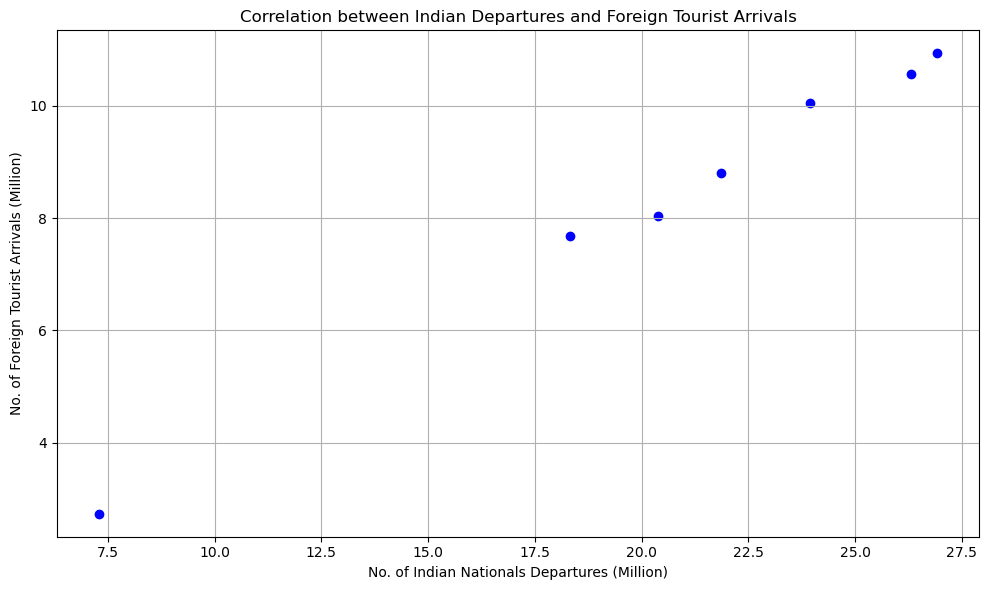

Correlation coefficient between Indian Departures and Foreign Tourist Arrivals: 0.9972326056915954


In [101]:
# Select relevant columns
indian_departures = general['noindfi']
foreign_arrivals = general['noftaii']

# Calculate correlation
correlation = indian_departures.corr(foreign_arrivals)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(indian_departures, foreign_arrivals, color='blue')
plt.title('Correlation between Indian Departures and Foreign Tourist Arrivals')
plt.xlabel('No. of Indian Nationals Departures (Million)')
plt.ylabel('No. of Foreign Tourist Arrivals (Million)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Correlation coefficient between Indian Departures and Foreign Tourist Arrivals:", correlation)


# Month Wise FFA

## Loading of data

In [9]:
monthwise = pd.read_csv("Month Wise FFA.csv")
monthwise.head()

,year,january,february,march,april,may,june,july,august,september,october,november,december
0,2014.0,757786.0,755678.0,690441.0,535321.0,465043.0,502028.0,568871.0,575750.0,509142.0,668398.0,765497.0,885144.0
1,2015.0,790854.0,761007.0,729154.0,541551.0,509869.0,512341.0,628323.0,599478.0,542600.0,683286.0,815947.0,912723.0
2,2016.0,844533.0,848782.0,809107.0,592004.0,527466.0,546972.0,733834.0,652111.0,608177.0,741770.0,878280.0,1021375.0
3,2017.0,964109.0,931025.0,885936.0,717899.0,622408.0,663470.0,779309.0,779309.0,719964.0,866976.0,997738.0,1167840.0
4,2018.0,1045027.0,1045028.0,1045029.0,1045030.0,1045031.0,1045032.0,1045033.0,1045034.0,1045035.0,1045036.0,1045037.0,1045038.0


## Data cleaning

In [42]:
monthwise.isnull().any()

year         False
january      False
february     False
march        False
april        False
may          False
june         False
july         False
august       False
september    False
october      False
november     False
december     False
dtype: bool

<p>Here since there are no null values, the data is cleaned and we can proceed with analysis.</p>

## Data analysis

In [230]:
# Extract available years
available_years = monthwise['year'].unique()

# Create dropdown widget for selecting the year
year_dropdown = Dropdown(options=available_years, description='Year')

# Define plotting function
def plot_monthly_distribution(year):
    plt.figure(figsize=(10, 6))

    # Filter data for the selected year
    year_data = monthwise[monthwise['year'] == year]

    # Plotting the bar chart
    plt.bar(year_data.columns[1:], year_data.iloc[0, 1:], color='skyblue')
    plt.title(f'Monthly Foreign Tourist Arrivals in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Tourist Arrivals')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display interactive plot with dropdown
interact(plot_monthly_distribution, year=year_dropdown)

interactive(children=(Dropdown(description='Year', options=(numpy.datetime64('1970-01-01T00:00:00.000002014'),…

<function __main__.plot_monthly_distribution(year)>

### Avergae Monthly Foreign Tourist Arrivals

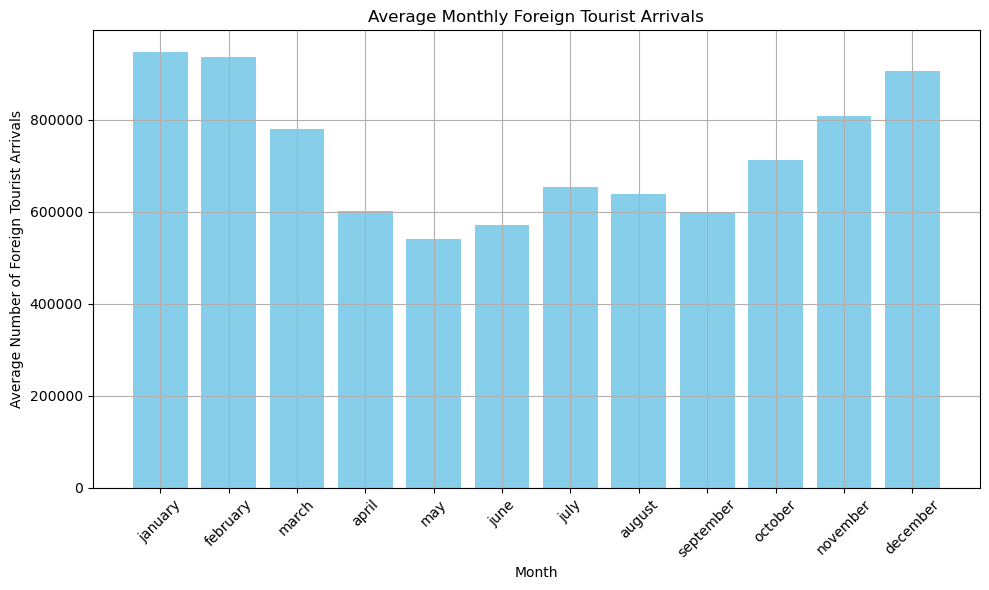

In [102]:
# Calculate the average tourist arrivals for each month across all years
monthly_avg_arrivals = monthwise.drop(columns=['year']).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_arrivals.index, monthly_avg_arrivals.values, color='skyblue')
plt.title('Average Monthly Foreign Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Average Number of Foreign Tourist Arrivals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


From the above graph, we can observe that most of the visitors are coming in the month of january and febraury.

### Line graph showing the month-wise foreign tourist arrivals over the years. Each line represents the trend for a specific month.

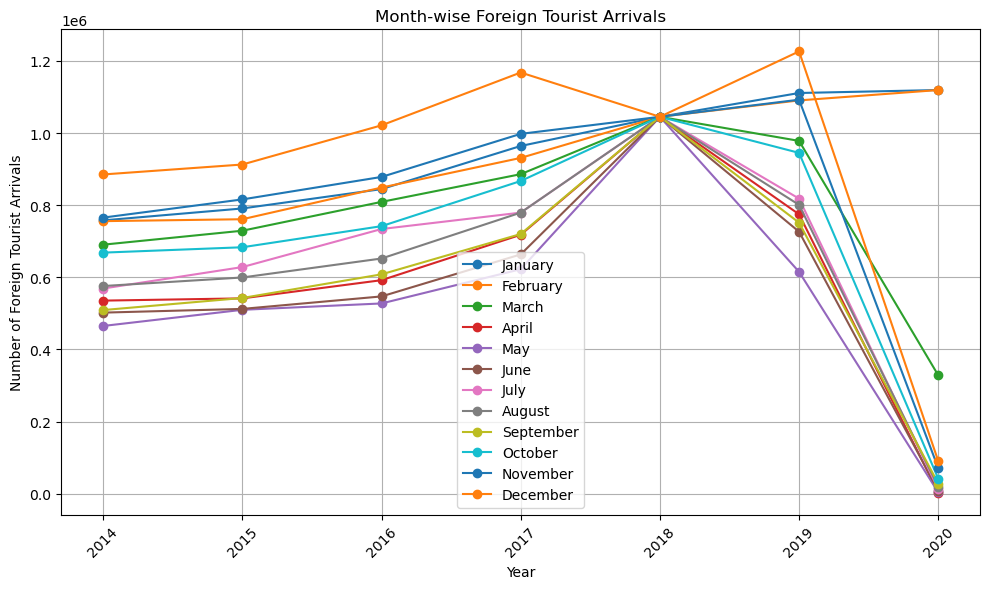

In [104]:
# Plotting
plt.figure(figsize=(10, 6))
for col in monthwise.columns[1:]:  # Exclude the 'year' column
    plt.plot(monthwise['year'], monthwise[col], marker='o', label=col.capitalize())

plt.title('Month-wise Foreign Tourist Arrivals')
plt.xlabel('Year')
plt.ylabel('Number of Foreign Tourist Arrivals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Distribution of FFA variables every month 

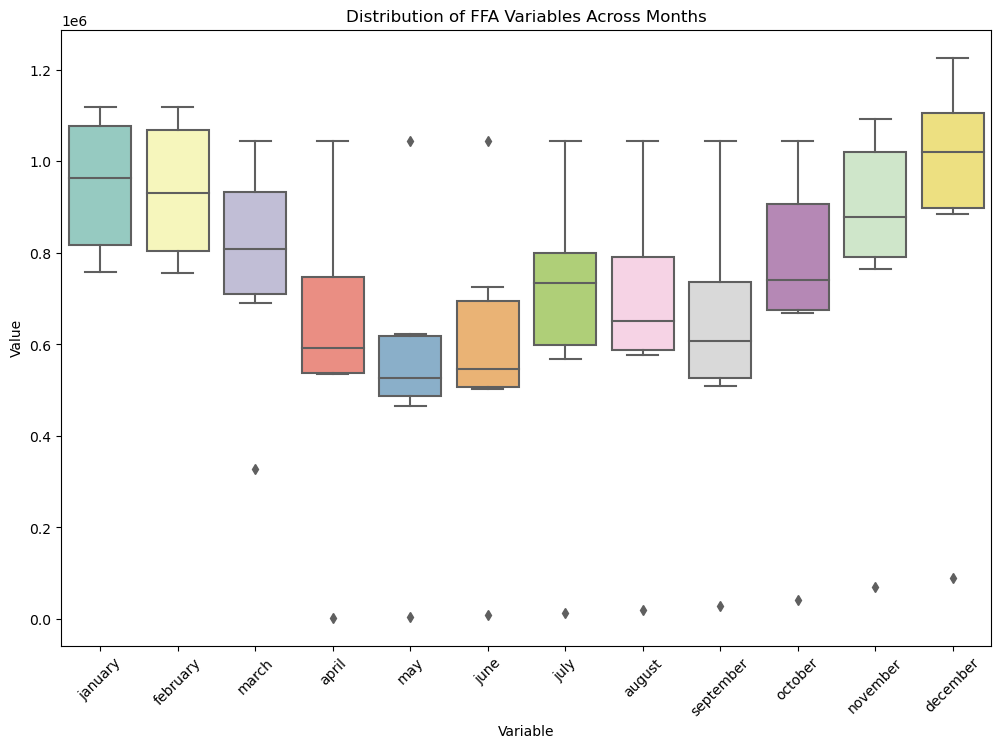

In [204]:
# Convert 'year' column to datetime format
monthwise['year'] = pd.to_datetime(monthwise['year'])

# Plot box plots for each variable across different months
plt.figure(figsize=(12, 8))
sns.boxplot(data=monthwise.iloc[:, 1:], palette='Set3')
plt.title('Distribution of FFA Variables Across Months')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

## Co-relation matrix of Monthly Tourist Arrivals 
### Displaying correlations between tourist arrivals in different months

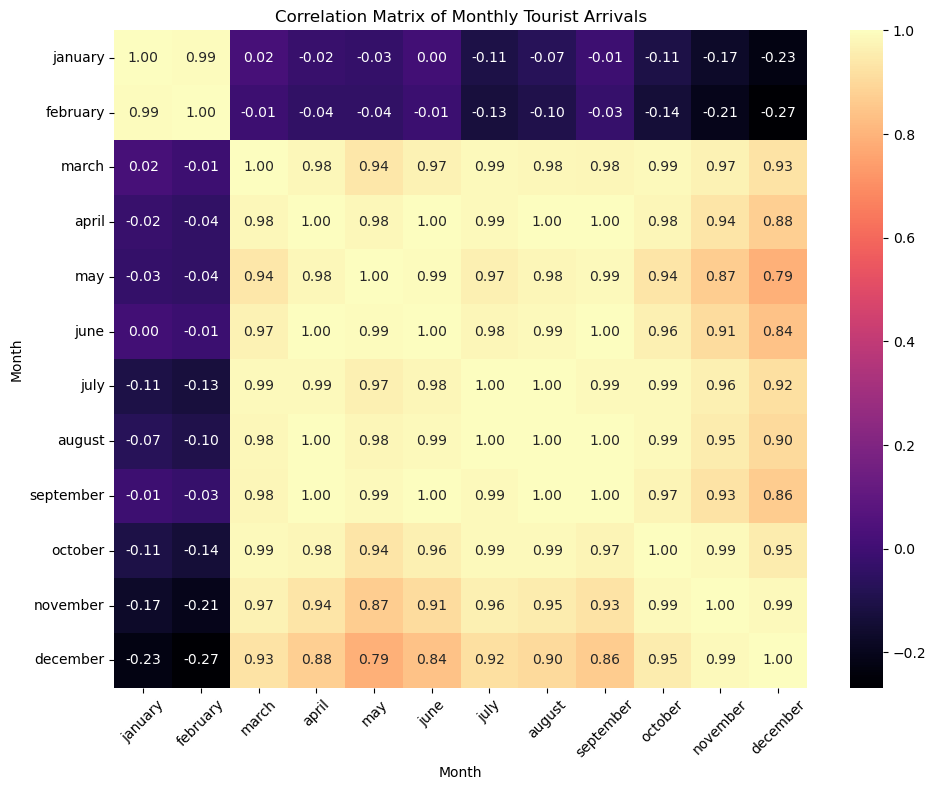

In [205]:
# Calculate the correlation matrix
correlation_matrix = monthwise.drop(columns=['year']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix of Monthly Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Kowstubha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



TypeError: unsupported operand type(s) for +: 'range' and 'list'

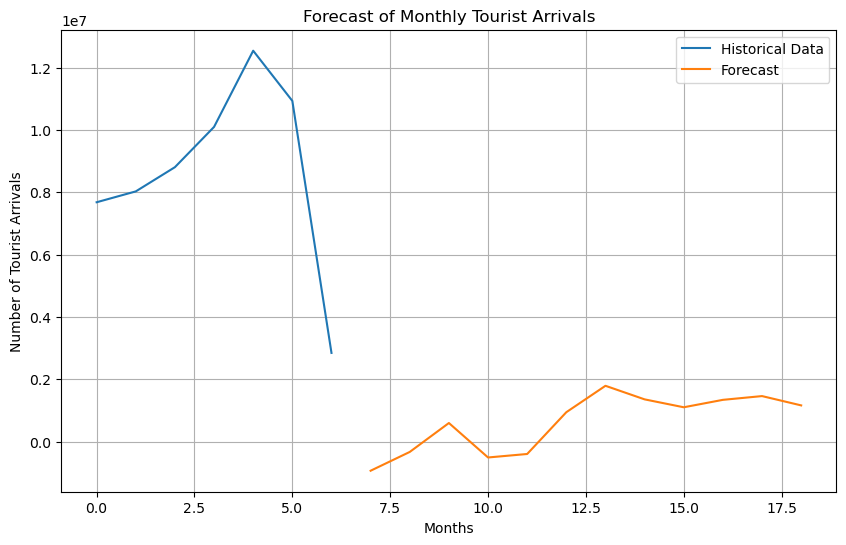

In [206]:
# Extracting month-wise data
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
monthly_arrivals = monthwise[months].sum(axis=1)

# Fit ARIMA model
model = ARIMA(monthly_arrivals, order=(5,1,0))  # Example order, you can tune this
fit_model = model.fit()

# Forecast future tourist arrivals
forecast = fit_model.forecast(steps=12)  # Forecast for the next 12 months

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_arrivals.index, monthly_arrivals, label='Historical Data')
plt.plot(range(len(monthly_arrivals), len(monthly_arrivals) + 12), forecast, label='Forecast')
plt.title('Forecast of Monthly Tourist Arrivals')
plt.xlabel('Months')
plt.ylabel('Number of Tourist Arrivals')
plt.legend()
plt.grid(True)
plt.xticks(range(len(monthly_arrivals)) + list(range(len(monthly_arrivals), len(monthly_arrivals) + 12)), 
           months + ['Forecast'], rotation=45)
plt.tight_layout()
plt.show()


### Overall Trend in Foreign Tourist Arrivals Over the Years

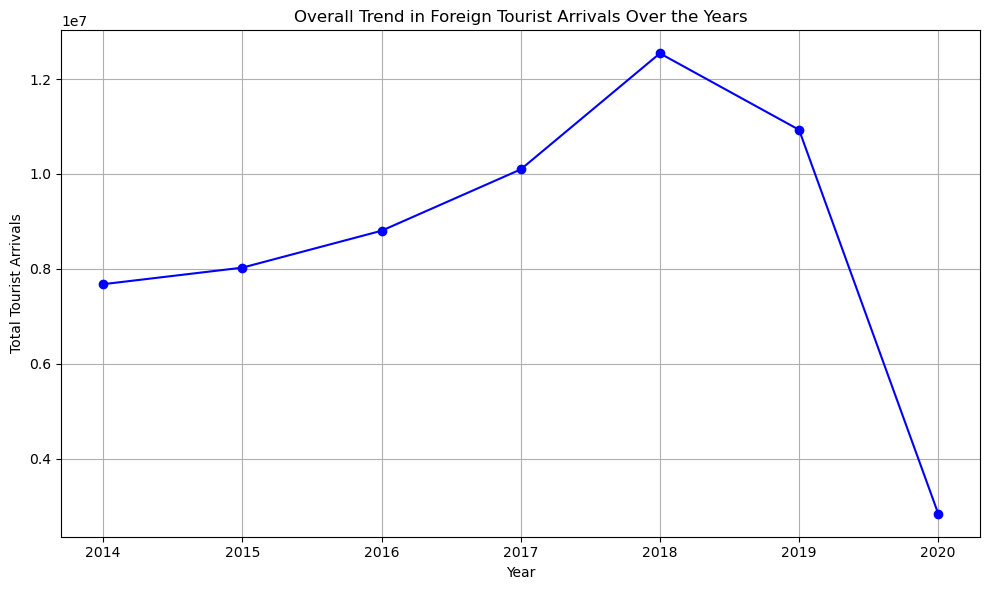

In [96]:
# Grouping the data by year and summing up the monthly tourist arrivals
yearly_total_arrivals = monthwise.groupby('year').sum().sum(axis=1)

# Plotting the overall trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_total_arrivals.index, yearly_total_arrivals.values, marker='o', color='blue')
plt.title('Overall Trend in Foreign Tourist Arrivals Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Tourist Arrivals')
plt.grid(True)
plt.tight_layout()
plt.show()

From the above line plot, we can get to know that total numbe rof visitors are more in the year 2018 and there is a sudden decrease from 2019 to 2020.

## Month Wise FFE Dollar, Top 10 Country FFA, Top 10 State Visit, Top10 State FFA Visit

## Loading of data

In [43]:
# Merging four files and creating a singular file to perform the analysis on:
import csv

def merge_csv_column_wise(files, output_file):
    # Lists to hold data from each file
    data_columns = []

    # Read data from input files
    for file in files:
        with open(file, 'r', newline='') as csvfile:
            reader = csv.reader(csvfile)
            data_columns.append(list(reader))

    # Calculate the maximum number of rows among all files
    max_rows = max(len(col) for col in data_columns)

    # Write data to output file
    with open(output_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write data column-wise
        for i in range(max_rows):
            row_data = [col[i] if i < len(col) else [] for col in data_columns]
            writer.writerow([item for sublist in row_data for item in sublist])

# List of input files
input_files = ['Month Wise FFE Dollar.csv', 'Top 10 Country FFA.csv', 'Top 10 State Visit.csv', 'Top10 State FFA Visit.csv']
# Output file
output_file = 'merged_column_wise.csv'

# Merge CSV files column-wise
merge_csv_column_wise(input_files, output_file)


## Data cleaning

In [44]:
#Finding if there are any Null or Duplicate values:

# Read the dataset
data = pd.read_csv('merged_column_wise.csv')

# Find Null Values
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)

# Find Duplicate Rows
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

# Drop Duplicate Rows
data.drop_duplicates(inplace=True)

Null Values:
year             0
january          0
february         0
march            0
april            0
                ..
top8_ftv.1       0
top9_state.1     0
top9_ftv.1       0
top10_state.1    0
top10_ftv.1      0
Length: 76, dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [year, january, february, march, april, may, june, july, augest, september, october, november, december, year.1, top1_country, top1_ftas, top2_country, top2_ftas, top3_country, top3_ftas, top4_country, top4_ftas, top5_country, top5_ftas, top6_country, top6_ftas, top7_country, top7_ftas, top8_country, top8_ftas, top9_country, top9_ftas, top10_country, top10_ftas, year.2, top1_state, top1_ftv, top2_state, top2_ftv, top3_state, top3_ftv, top4_state, top4_ftv, top5_state, top5_ftv, top6_state, top6_ftv, top7_state, top7_ftv, top8_state, top8_ftv, top9_state, top9_ftv, top10_state, top10_ftv, year.3, top1_state.1, top1_ftv.1, top2_state.1, top2_ftv.1, top3_state.1, top3_ftv.1, top4_state.1, top4_ftv.1, top5

## Data analysis

In [84]:
data = pd.read_csv('merged_column_wise.csv')
data.dropna(inplace=True)

numeric_columns = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'augest', 'september', 'october', 'november', 'december']
data[numeric_columns] = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()

selected_features = data.iloc[:, :10]

print(selected_features.head())

   year   january  february     march     april       may      june      july  \
0  2014 -1.145852 -1.146439 -0.337562 -0.218304 -0.203721 -0.140404 -0.194195   
1  2015 -0.983737 -1.069089 -0.225439 -0.112051  0.020372 -0.103515  0.002781   
2  2016 -0.766752 -0.726539  0.033947  0.027629  0.362333  0.013739  0.278777   
3  2017 -0.048456  0.069063  0.512558  0.606647  0.616984  0.574978  0.473463   
4  2018  1.126256  1.370202  1.222107  0.807214  0.599522  0.722533  0.671584   

     augest  september  
0 -0.085475  -0.206718  
1 -0.028960  -0.094083  
2  0.122158   0.132512  
3  0.469850   0.669185  
4  0.730312   0.605579  


Descriptive Statistics:
              year   january  february     march     april       may  \
count     7.000000  7.000000   7.00000  7.000000  7.000000  7.000000   
mean   2017.000000  2.339429   2.26400  1.917714  1.702857  1.477000   
std       2.160247  0.400949   0.36199  0.597563  0.837625  0.687214   
min    2014.000000  1.880000   1.84900  0.784000  0.009000  0.012000   
25%    2015.500000  1.988500   1.93900  1.749500  1.564500  1.414000   
50%    2017.000000  2.320000   2.28900  1.938000  1.726000  1.726000   
75%    2018.500000  2.683000   2.53600  2.277500  2.295000  1.895000   
max    2020.000000  2.833000   2.76000  2.648000  2.466000  1.983000   

           june      july    augest  september  ...    top1_ftv.1  \
count  7.000000  7.000000  7.000000    7.00000  ...  7.000000e+00   
mean   1.576571  1.881571  1.775571    1.64400  ...  4.763701e+06   
std    0.759036  0.873202  0.813937    0.75465  ...  1.756711e+06   
min    0.027000  0.041000  0.064000    0.09400  ...

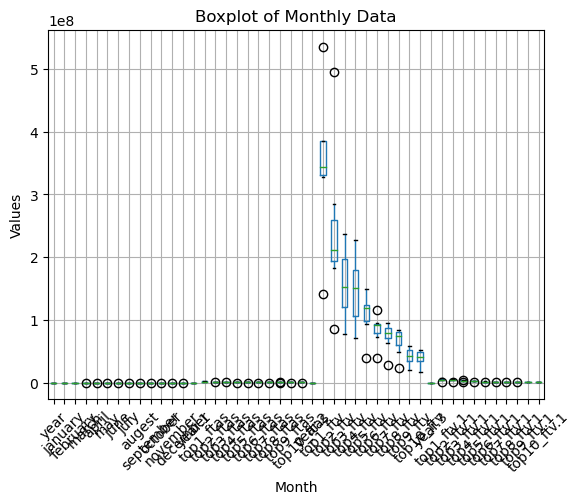

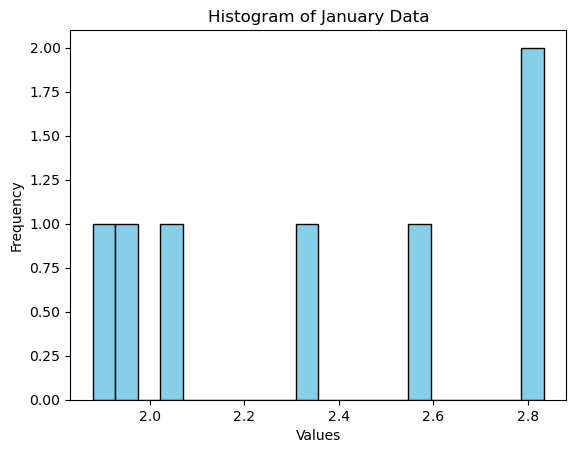

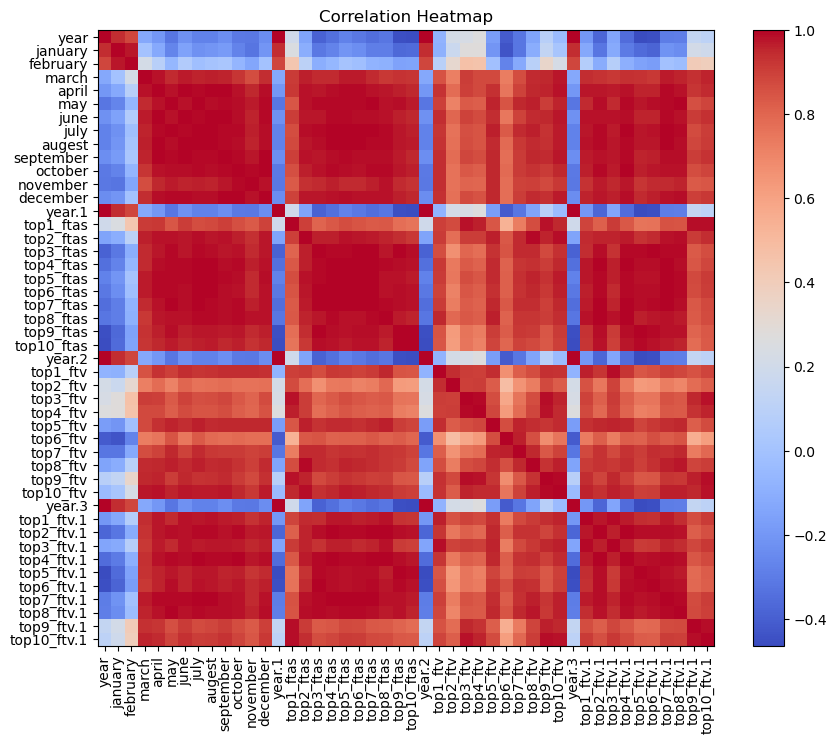

In [85]:
# Read the preprocessed dataset
data = pd.read_csv('merged_column_wise.csv')

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Descriptive Statistics
descriptive_stats = numeric_data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Data Visualization
# Example: Box plot for each month's data
numeric_data.boxplot(rot=45)
plt.title('Boxplot of Monthly Data')
plt.xlabel('Month')
plt.ylabel('Values')
plt.show()

# Example: Histogram for a specific column (e.g., January)
plt.hist(numeric_data['january'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of January Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Example: Correlation Heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(numeric_data.columns)), numeric_data.columns, rotation=90)
plt.yticks(np.arange(len(numeric_data.columns)), numeric_data.columns)
plt.show()


Months: january, february, march, april, may, june, july, august , october, september, october, november, december
Enter a month (e.g., January): march


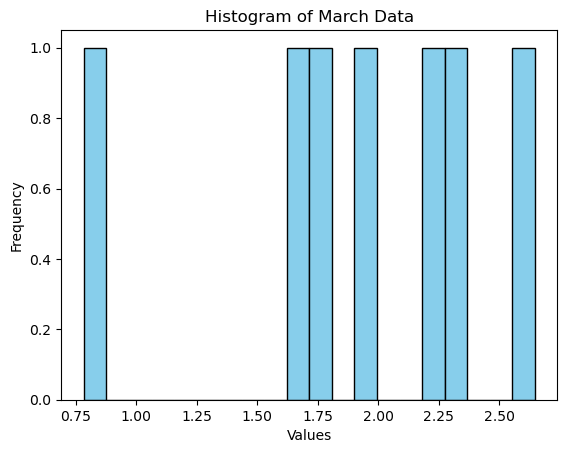

In [86]:
# Read the preprocessed dataset
data = pd.read_csv('merged_column_wise.csv')

# Define a function to generate histogram for a specific month
def plot_histogram(month):
    plt.hist(data[month], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {month.capitalize()} Data')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

# Create a text-based input to select the month
print("Months: january, february, march, april, may, june, july, august , october, september, october, november, december")
month_input = input("Enter a month (e.g., January): ")

# Check if the input month is valid
if month_input in data.columns[1:13]:
    plot_histogram(month_input)
else:
    print("Invalid month. Please enter a valid month name (e.g., January).")

### THOROUGH ANALYSIS:
Histograms are chosen to analyze the distribution of numerical data for each month,
aiding in identifying patterns or outliers. Box-whisker plots provide a succinct
summary of numerical data distribution, assisting in comparing variables across
different categories. Bar plots are utilized to visualize categorical data,
facilitating comparisons of frequency or count across different groups, such as
countries or states, aiding in identifying top performers. Together, these
visualizations offer a comprehensive understanding of data distribution, trends,
and relationships, supporting thorough data analysis and insightful decision-making.

In [87]:
# Read the dataset
data = pd.read_csv('merged_column_wise.csv')

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
              year   january  february     march     april       may  \
count     7.000000  7.000000   7.00000  7.000000  7.000000  7.000000   
mean   2017.000000  2.339429   2.26400  1.917714  1.702857  1.477000   
std       2.160247  0.400949   0.36199  0.597563  0.837625  0.687214   
min    2014.000000  1.880000   1.84900  0.784000  0.009000  0.012000   
25%    2015.500000  1.988500   1.93900  1.749500  1.564500  1.414000   
50%    2017.000000  2.320000   2.28900  1.938000  1.726000  1.726000   
75%    2018.500000  2.683000   2.53600  2.277500  2.295000  1.895000   
max    2020.000000  2.833000   2.76000  2.648000  2.466000  1.983000   

           june      july    augest  september  ...    top1_ftv.1  \
count  7.000000  7.000000  7.000000    7.00000  ...  7.000000e+00   
mean   1.576571  1.881571  1.775571    1.64400  ...  4.763701e+06   
std    0.759036  0.873202  0.813937    0.75465  ...  1.756711e+06   
min    0.027000  0.041000  0.064000    0.09400  ...

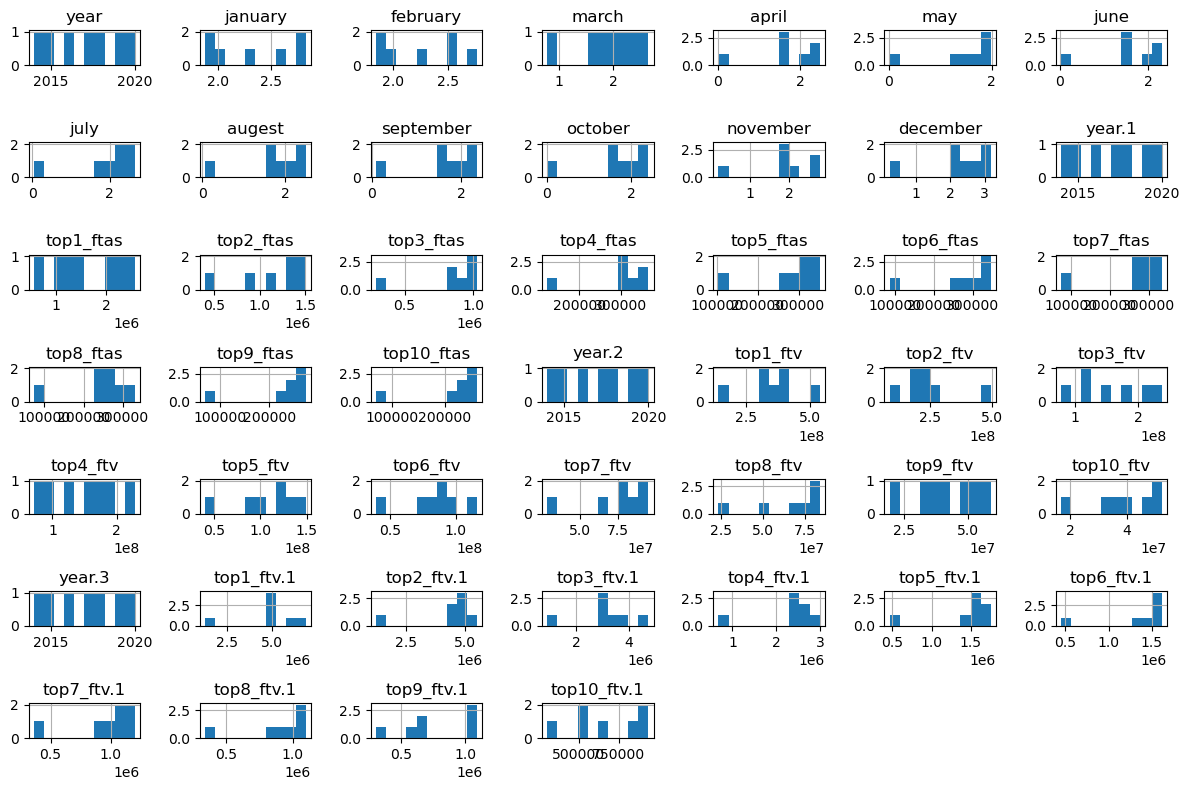

In [88]:
# 2. Data Distributions
# Example: Histogram for numerical variables
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

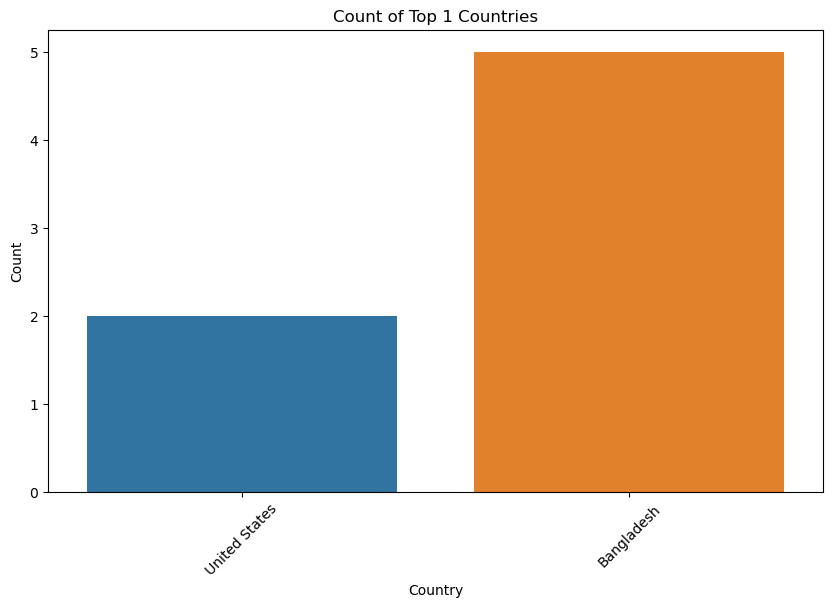

In [89]:
# Example: Bar plot for categorical variables
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='top1_country', data=data)
plt.title('Count of Top 1 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

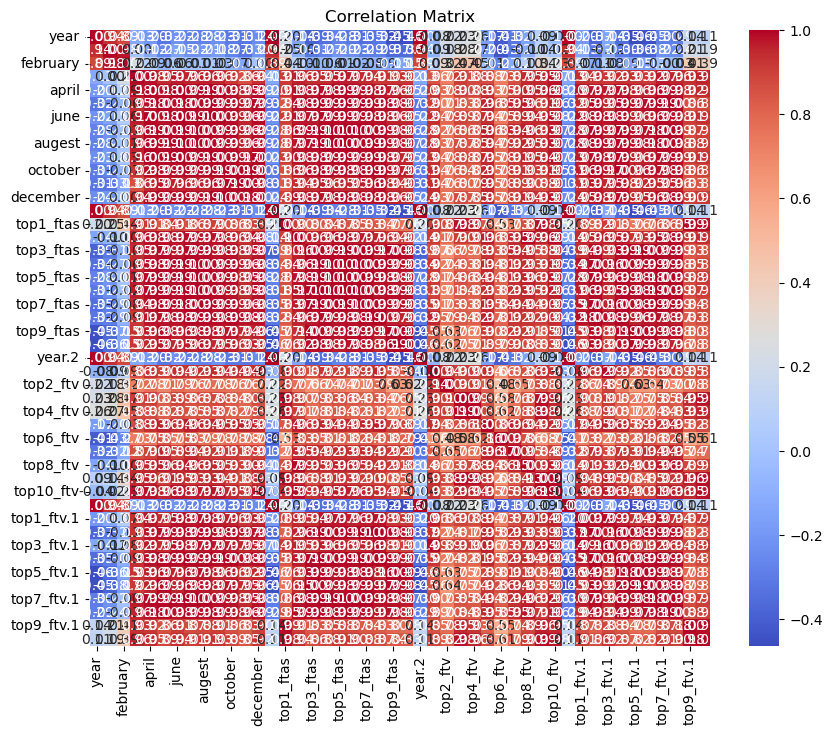

In [90]:
# 3. Correlation Analysis
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Compute correlation matrix for numeric data
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

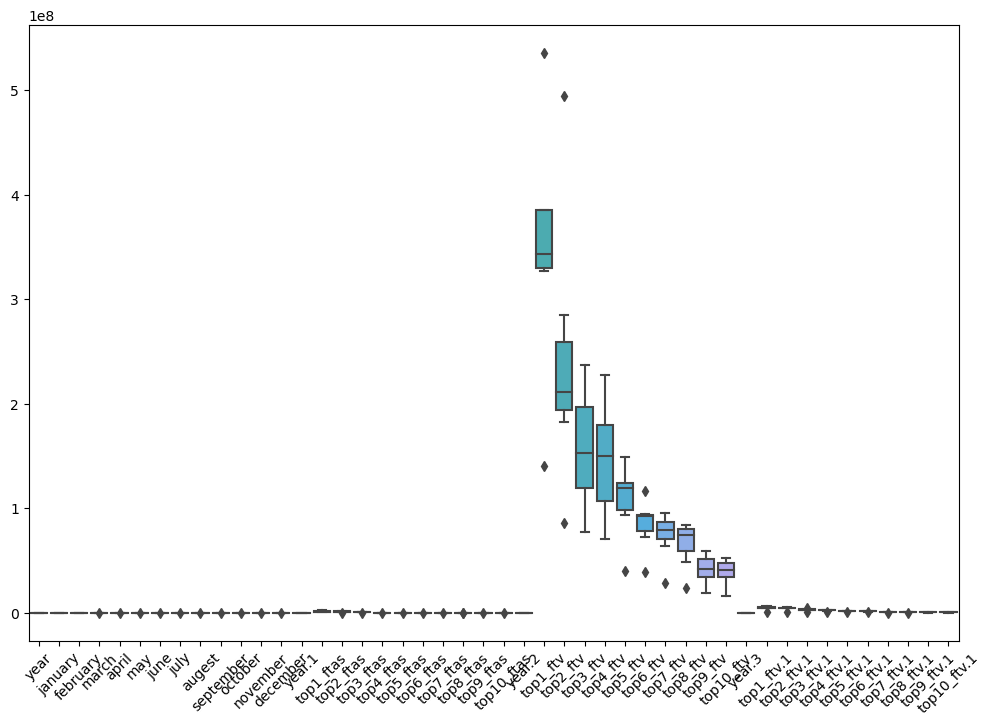

In [91]:
# 4. Outlier Detection
# Example: Box plot for numerical variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

In [92]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Perform normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)


NameError: name 'MinMaxScaler' is not defined

## Data Visualization - Explore relationships and trends further:

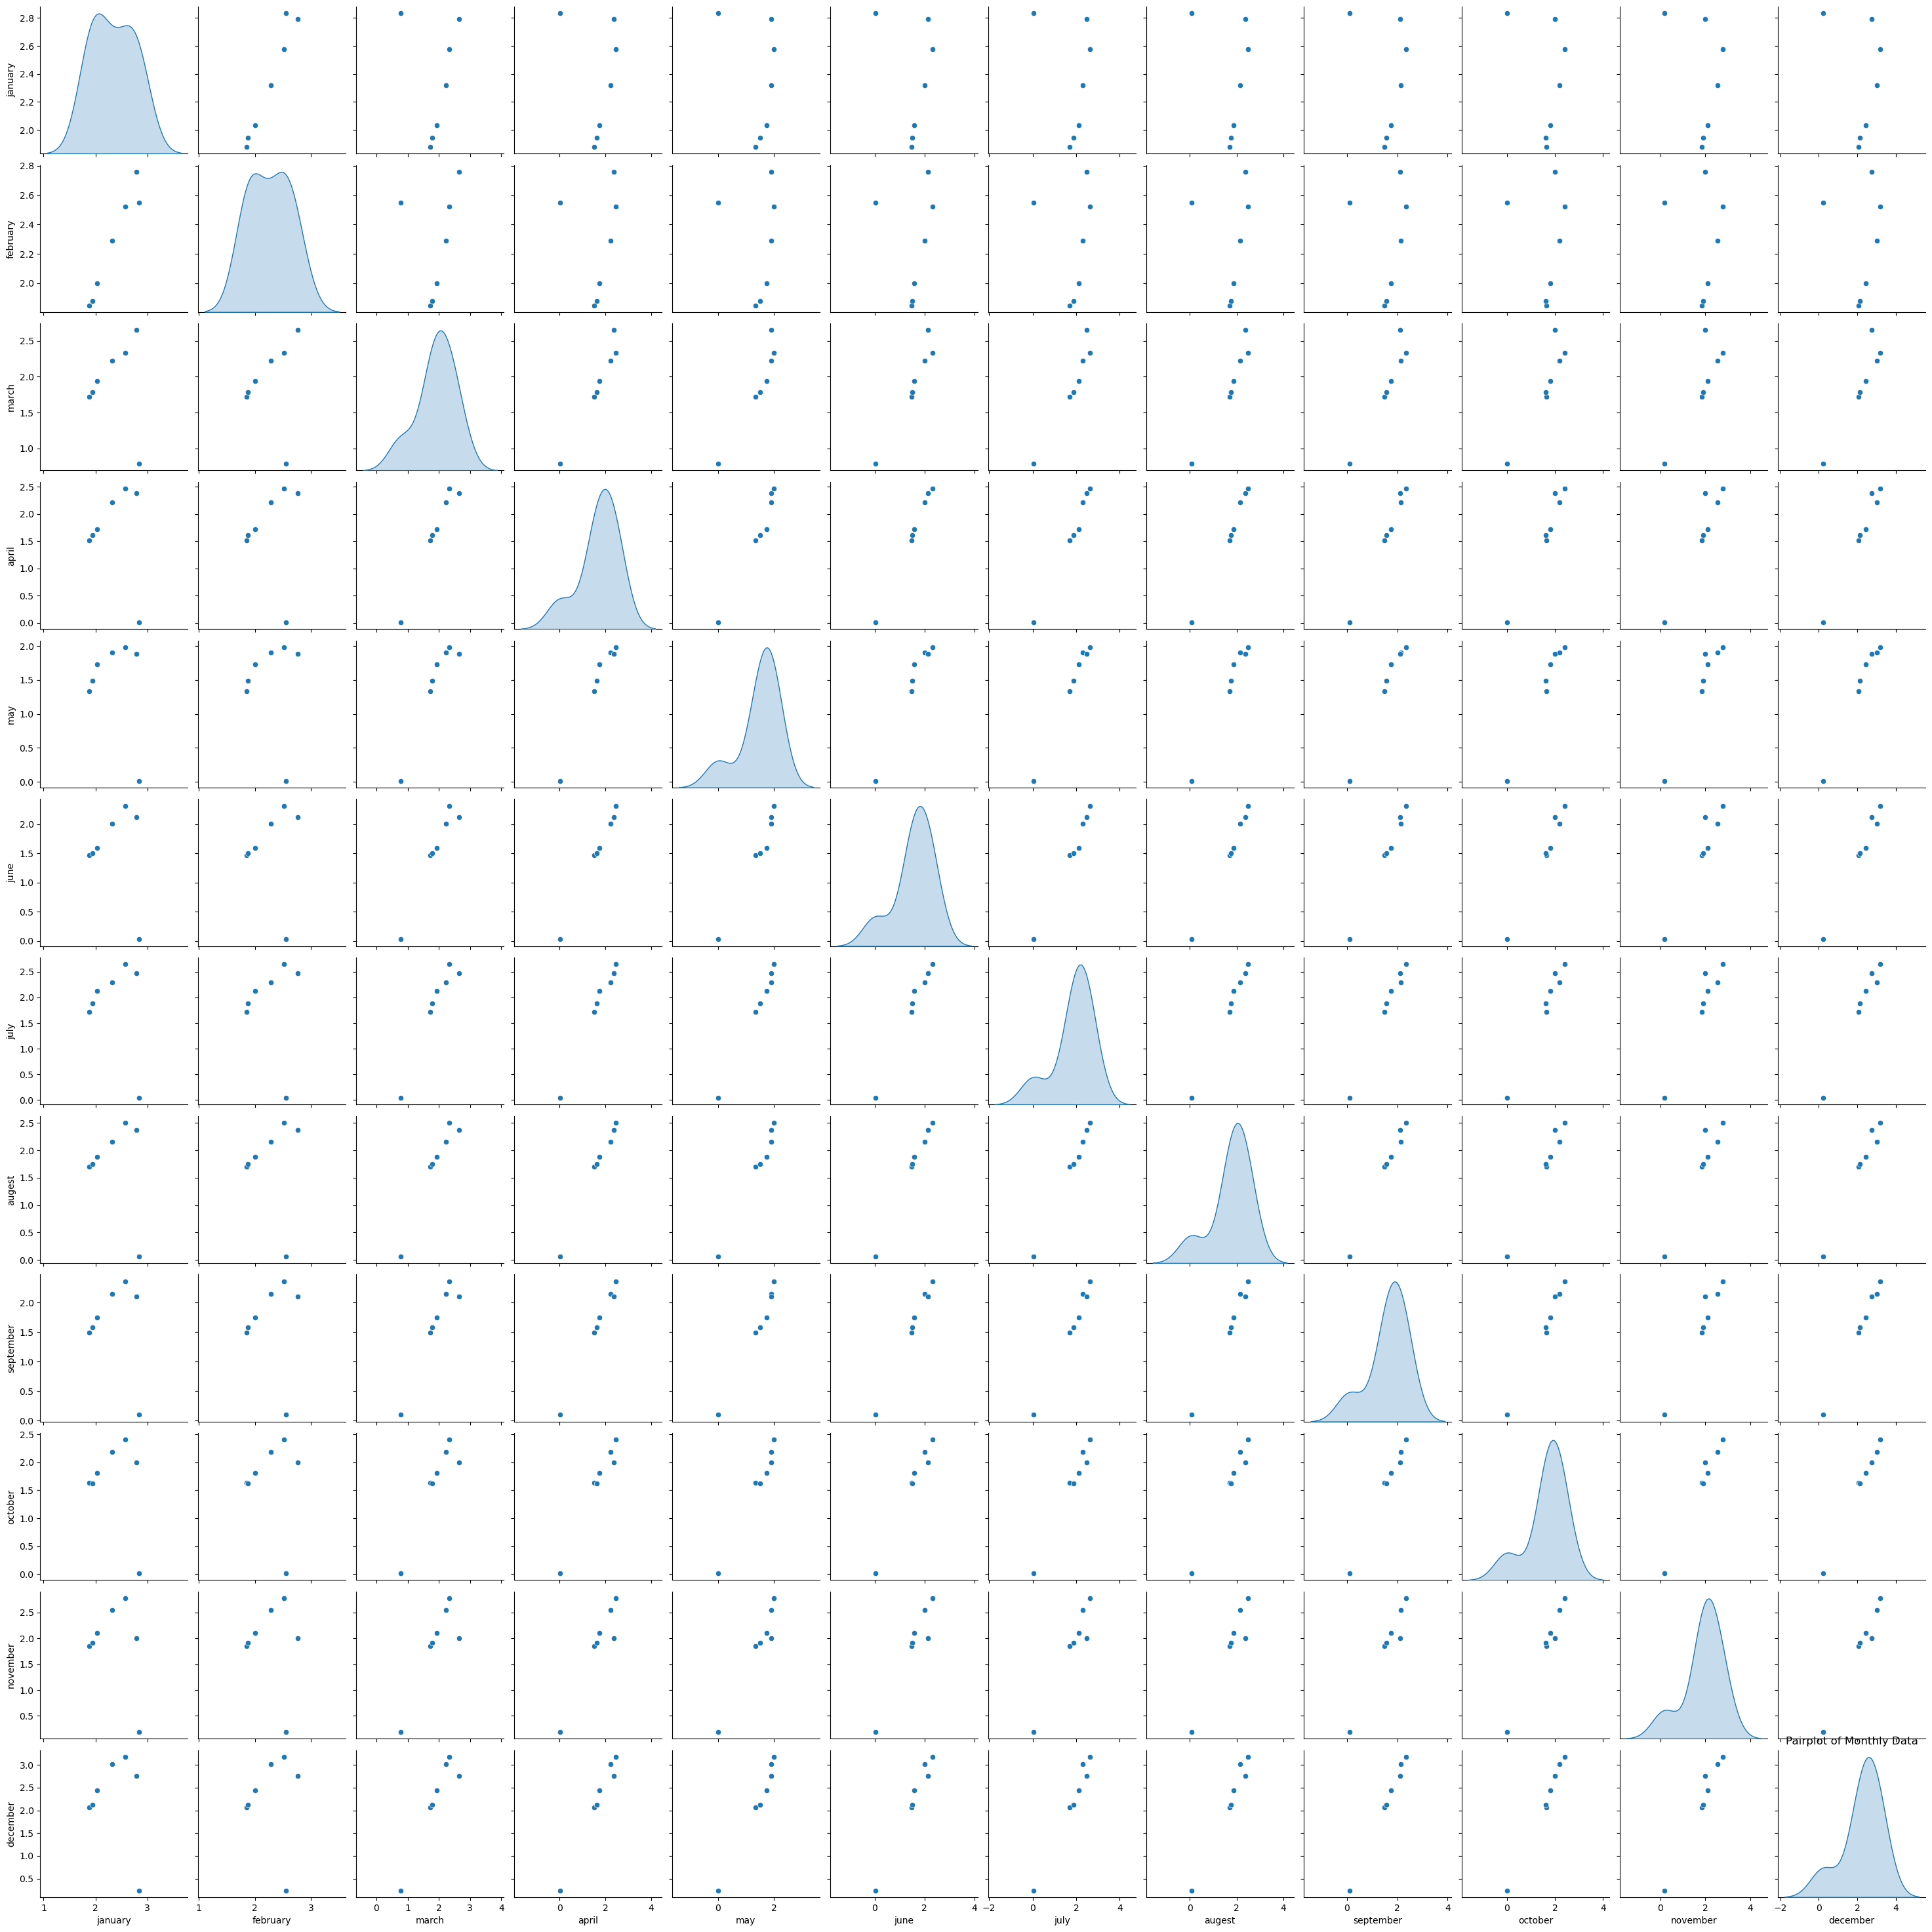

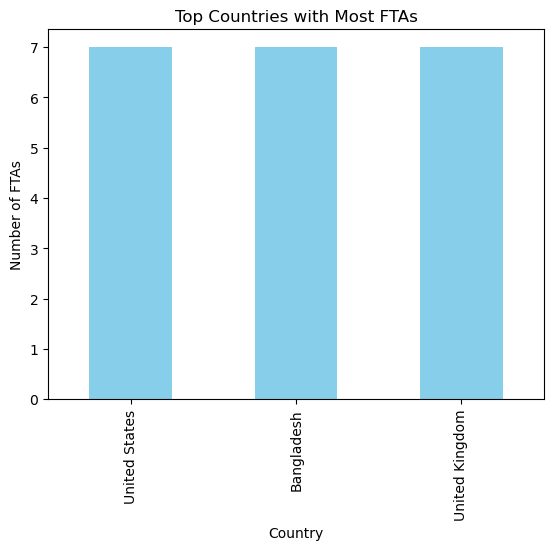

In [93]:
# Example: Pairplot for exploring relationships between numerical variables
sns.pairplot(data, vars=['january', 'february', 'march', 'april', 'may','june','july','augest','september', 'october','november','december'], diag_kind='kde')
plt.title('Pairplot of Monthly Data')
plt.show()

# Example: Bar plot to visualize the top countries with the most FTAs
top_countries = data[['top1_country', 'top2_country', 'top3_country']]
top_countries_stacked = top_countries.stack().value_counts().head(10)
top_countries_stacked.plot(kind='bar', color='skyblue')
plt.title('Top Countries with Most FTAs')
plt.xlabel('Country')
plt.ylabel('Number of FTAs')
plt.show()

## Model Building and Evaluation - Perform as per requirements:

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Linear Regression model using selected features
X = data[['january', 'february', 'march', 'april', 'may']]
y = data['year']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.236829821605036
